<a href="https://colab.research.google.com/github/Prokhorenko-Evgeny/IrisID_gr2/blob/Prokhorenko-Evgeniy-folder/Prokhorenko-Evgeniy/%22%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B4%D0%B0%D1%82%D0%B0_%D1%81%D0%B5%D1%82%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%81%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B8_07_06%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.google.com/spreadsheets/d/1p5XxlS3kKzjlq5MI2lxOW2UuE0hN7KbtuPd8d-GN2Ag/edit#gid=2096248759

# Загрузка и подготовка данных для подачи в нейронную сеть

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! pip install Augmentor
import Augmentor
import zipfile
import os
import cv2
import shutil
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
# Строим график точности на проверочной выборке
import matplotlib.pyplot as plt

# Утилиты предобработки данных
from keras import  utils

# устанавливаем Autokeras
!pip install autokeras
!pip install --upgrade autokeras
import autokeras as ak

from PIL import Image                     # Отрисовка изображений
import random                             # Генерация случайных чисел 
import tensorflow as tf
'''
это одна из наиболее популярных библиотек машинного обучения и искусственного 
интеллекта. Она используется для создания и обучения различных моделей машинного
обучения, в том числе нейронных сетей.
'''
from sklearn.metrics import confusion_matrix #
!pip install keras-tuner --upgrade
from keras_tuner.applications import HyperResNet
import keras_tuner
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Загрузка датасета. Подготовка изображений. Аугментаци. Обрезание по окружности. Разверертки круга в плоскость.

In [ ]:
# Разархивация датасета в директорию '/content/drive/MyDrive/Dekart'
!unzip -qo "/content/drive/MyDrive/Dekart/Iris.zip" -d /content/drive/MyDrive/Dekart/Dekart64
# Указываем путь к архиву и название папки, в которую нужно распаковать
zip_path = "/content/drive/MyDrive/Dekart/Iris.zip"
# Папка с папками картинок, рассортированных по категориям
dir_path = '/content/drive/MyDrive/Dekart/Dekart64/'
# задаем путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/Dekart64/'
# создаем новую папку для тестирования
test_folder_path = '/content/drive/MyDrive/Dekart/test'
if not os.path.exists(test_folder_path):
    os.makedirs(test_folder_path)
# проходим по всем папкам в исходной директории
for dirpath, dirnames, filenames in os.walk(folder_path):
    # если в папке есть файлы, выбираем случайный и перемещаем его в новую папку
    if len(filenames) > 0:
        selected_file = random.choice(filenames)
        # создаем новую папку с таким же названием, как исходная
        new_dir_path = os.path.join(test_folder_path, os.path.basename(dirpath))
        if not os.path.exists(new_dir_path):
            os.makedirs(new_dir_path)
        # перемещаем выбранный файл в новую папку
        src_file_path = os.path.join(dirpath, selected_file)
        dst_file_path = os.path.join(new_dir_path, selected_file)
        shutil.move(src_file_path, dst_file_path)
        # удаляем файл из старой папки
        #os.remove(src_file_path)

In [ ]:

for folder in os.listdir(dir_path):
    if os.path.isdir(os.path.join(dir_path, folder)):
        # Создаем генератор аугментации для каждой папки
        p = Augmentor.Pipeline(os.path.join(dir_path, folder), output_directory=os.path.join(dir_path, folder))
        # Добавляем операции аугментации
        # Вращение изображения
        p.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
        # Изменение яркости
        p.random_brightness(probability=0.5, min_factor=1.0, max_factor=1.2)
        # Изменение контрастности
        p.random_contrast(probability=0.5, min_factor=1.0, max_factor=1.2)
        #Изменение размера
        #p.resize(probability=1.0, width=300, height=300)
        try:
            # Применяем аугментацию
            p.sample(11)
        except PIL.UnidentifiedImageError as e:
            print("Encountered an error: ", e.args)
            continue
        print('Аугментация завершена')
        print(folder, '- Аугментация завершена')        

Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/036.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB18F520>: 100%|██████████| 11/11 [00:00<00:00, 19.29 Samples/s]


Аугментация завершена
036 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/037.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1BB310>: 100%|██████████| 11/11 [00:00<00:00, 28.26 Samples/s]


Аугментация завершена
037 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/038.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1BAE00>: 100%|██████████| 11/11 [00:00<00:00, 16.52 Samples/s]


Аугментация завершена
038 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/039.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1BBA00>: 100%|██████████| 11/11 [00:00<00:00, 26.51 Samples/s]


Аугментация завершена
039 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/040.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9FB1CAD40>: 100%|██████████| 11/11 [00:00<00:00, 21.37 Samples/s]


Аугментация завершена
040 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/041.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1B9F60>: 100%|██████████| 11/11 [00:00<00:00, 21.44 Samples/s]


Аугментация завершена
041 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/042.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1CBDF0>: 100%|██████████| 11/11 [00:00<00:00, 21.74 Samples/s]


Аугментация завершена
042 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/043.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB18DA50>: 100%|██████████| 11/11 [00:00<00:00, 26.54 Samples/s]


Аугментация завершена
043 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/044.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1DF910>: 100%|██████████| 11/11 [00:00<00:00, 22.43 Samples/s]


Аугментация завершена
044 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/045.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1DEF50>: 100%|██████████| 11/11 [00:00<00:00, 22.49 Samples/s]


Аугментация завершена
045 - Аугментация завершена
Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/046.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1CB310>: 100%|██████████| 11/11 [00:00<00:00, 22.48 Samples/s]


Аугментация завершена
046 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/047.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FD6BE860>: 100%|██████████| 11/11 [00:00<00:00, 26.52 Samples/s]


Аугментация завершена
047 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/048.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1CB310>: 100%|██████████| 11/11 [00:00<00:00, 25.00 Samples/s]


Аугментация завершена
048 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/049.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1FCF70>: 100%|██████████| 11/11 [00:00<00:00, 22.40 Samples/s]


Аугментация завершена
049 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/050.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1FDA20>: 100%|██████████| 11/11 [00:00<00:00, 21.57 Samples/s]


Аугментация завершена
050 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/051.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1FF1F0>: 100%|██████████| 11/11 [00:00<00:00, 25.48 Samples/s]


Аугментация завершена
051 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/052.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1FF520>: 100%|██████████| 11/11 [00:00<00:00, 21.63 Samples/s]


Аугментация завершена
052 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/053.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1FDA80>: 100%|██████████| 11/11 [00:00<00:00, 24.35 Samples/s]


Аугментация завершена
053 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/054.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FD6BE860>: 100%|██████████| 11/11 [00:00<00:00, 23.80 Samples/s]


Аугментация завершена
054 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/055.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FD9C2860>: 100%|██████████| 11/11 [00:00<00:00, 32.08 Samples/s]


Аугментация завершена
055 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/056.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80455D0>: 100%|██████████| 11/11 [00:00<00:00, 33.72 Samples/s]


Аугментация завершена
056 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/057.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1CBEB0>: 100%|██████████| 11/11 [00:00<00:00, 23.99 Samples/s]


Аугментация завершена
057 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/058.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1BA170>: 100%|██████████| 11/11 [00:00<00:00, 23.68 Samples/s]


Аугментация завершена
058 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/059.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1B9C00>: 100%|██████████| 11/11 [00:00<00:00, 24.83 Samples/s]


Аугментация завершена
059 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/060.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F805DF30>: 100%|██████████| 11/11 [00:00<00:00, 26.51 Samples/s]


Аугментация завершена
060 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/061.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F805EDA0>: 100%|██████████| 11/11 [00:00<00:00, 23.09 Samples/s]


Аугментация завершена
061 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/062.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F8070430>: 100%|██████████| 11/11 [00:00<00:00, 25.01 Samples/s]


Аугментация завершена
062 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/063.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F804D3C0>: 100%|██████████| 11/11 [00:00<00:00, 22.09 Samples/s]


Аугментация завершена
063 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/064.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F804D000>: 100%|██████████| 11/11 [00:00<00:00, 21.51 Samples/s]


Аугментация завершена
064 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/001.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F804F460>: 100%|██████████| 11/11 [00:00<00:00, 22.19 Samples/s]


Аугментация завершена
001 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/002.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F804F850>: 100%|██████████| 11/11 [00:00<00:00, 29.44 Samples/s]


Аугментация завершена
002 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/003.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F8082650>: 100%|██████████| 11/11 [00:00<00:00, 21.40 Samples/s]


Аугментация завершена
003 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/004.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80832E0>: 100%|██████████| 11/11 [00:00<00:00, 24.11 Samples/s]


Аугментация завершена
004 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/005.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F8083FA0>: 100%|██████████| 11/11 [00:00<00:00, 21.61 Samples/s]


Аугментация завершена
005 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/006.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F805D720>: 100%|██████████| 11/11 [00:00<00:00, 24.49 Samples/s]


Аугментация завершена
006 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/007.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F804F670>: 100%|██████████| 11/11 [00:00<00:00, 22.79 Samples/s]


Аугментация завершена
007 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/008.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F809DA80>: 100%|██████████| 11/11 [00:00<00:00, 23.74 Samples/s]


Аугментация завершена
008 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/009.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F809FFD0>: 100%|██████████| 11/11 [00:00<00:00, 29.28 Samples/s]


Аугментация завершена
009 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/010.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80AD2A0>: 100%|██████████| 11/11 [00:00<00:00, 26.52 Samples/s]


Аугментация завершена
010 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/011.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F804FC40>: 100%|██████████| 11/11 [00:00<00:00, 23.31 Samples/s]


Аугментация завершена
011 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/012.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80814B0>: 100%|██████████| 11/11 [00:00<00:00, 22.81 Samples/s]


Аугментация завершена
012 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/013.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9FB1DDE40>: 100%|██████████| 11/11 [00:00<00:00, 24.50 Samples/s]


Аугментация завершена
013 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/014.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F809FBE0>: 100%|██████████| 11/11 [00:00<00:00, 25.05 Samples/s]


Аугментация завершена
014 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/015.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F809D180>: 100%|██████████| 11/11 [00:00<00:00, 20.80 Samples/s]


Аугментация завершена
015 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/016.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F809D7E0>: 100%|██████████| 11/11 [00:00<00:00, 21.91 Samples/s]


Аугментация завершена
016 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/017.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80D2980>: 100%|██████████| 11/11 [00:00<00:00, 20.66 Samples/s]


Аугментация завершена
017 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/018.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80D3BB0>: 100%|██████████| 11/11 [00:00<00:00, 23.65 Samples/s]


Аугментация завершена
018 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/019.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80E0820>: 100%|██████████| 11/11 [00:00<00:00, 29.24 Samples/s]


Аугментация завершена
019 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/020.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F809FD90>: 100%|██████████| 11/11 [00:00<00:00, 24.87 Samples/s]


Аугментация завершена
020 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/021.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80D1D50>: 100%|██████████| 11/11 [00:00<00:00, 20.95 Samples/s]


Аугментация завершена
021 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/022.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80E35E0>: 100%|██████████| 11/11 [00:00<00:00, 27.99 Samples/s]


Аугментация завершена
022 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/023.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80D38B0>: 100%|██████████| 11/11 [00:00<00:00, 23.78 Samples/s]


Аугментация завершена
023 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/024.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F8102BF0>: 100%|██████████| 11/11 [00:00<00:00, 19.83 Samples/s]


Аугментация завершена
024 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/025.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F8102800>: 100%|██████████| 11/11 [00:00<00:00, 30.94 Samples/s]


Аугментация завершена
025 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/026.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F81019F0>: 100%|██████████| 11/11 [00:00<00:00, 23.28 Samples/s]


Аугментация завершена
026 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/027.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F8116590>: 100%|██████████| 11/11 [00:00<00:00, 19.98 Samples/s]


Аугментация завершена
027 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/028.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F8117A30>: 100%|██████████| 11/11 [00:00<00:00, 20.28 Samples/s]


Аугментация завершена
028 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/029.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F8115B40>: 100%|██████████| 11/11 [00:00<00:00, 21.69 Samples/s]


Аугментация завершена
029 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/030.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9F80AEA10>: 100%|██████████| 11/11 [00:00<00:00, 24.11 Samples/s]


Аугментация завершена
030 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/031.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FA9E0F06DA0>: 100%|██████████| 11/11 [00:00<00:00, 25.99 Samples/s]


Аугментация завершена
031 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/032.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9E0F1C550>: 100%|██████████| 11/11 [00:00<00:00, 24.40 Samples/s]


Аугментация завершена
032 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/033.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9E0F1D3F0>: 100%|██████████| 11/11 [00:00<00:00, 25.83 Samples/s]


Аугментация завершена
033 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/034.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9F80C2EC0>: 100%|██████████| 11/11 [00:00<00:00, 21.34 Samples/s]


Аугментация завершена
034 - Аугментация завершена
Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Dekart/Dekart64/035.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FA9FB18EA10>: 100%|██████████| 11/11 [00:00<00:00, 21.87 Samples/s]

Аугментация завершена
035 - Аугментация завершена


## Архивируем данные после выделения тестовой выборки 

In [ ]:
def create_archive(folder_path, archive_path):
    """Функция для создания архива папки"""
    with zipfile.ZipFile(archive_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                arcname = os.path.join(os.path.relpath(root, start=folder_path), file)
                zipf.write(os.path.join(root, file), arcname=arcname)

# Путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/Dekart64/'

# Путь до создаваемого архива
archive_path = '/content/drive/MyDrive/Dekart/Dekart64.zip'

# Создание архива
create_archive(folder_path, archive_path)

# Путь до папки с результатами
folder_path1 = '/content/drive/MyDrive/Dekart/test'

# Путь до создаваемого архива
archive_path1 = '/content/drive/MyDrive/Dekart/test.zip'

# Создание архива
create_archive(folder_path1, archive_path1)

## Функция для преобразования изображения в декартову систему координат

In [ ]:
# Функция для преобразования изображения в декартову систему координат
def cartesian_warp(img):
    height, width = img.shape[:-1]
    cartImg = np.zeros((height, width, 3), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            # Преобразуем координаты (x,y) в полярные координаты (r,theta)
            r = np.sqrt((x - width / 2)**2 + (y - height / 2)**2)
            theta = np.arctan2(y - height / 2, x - width / 2)

            # Вычисляем соответствующие координаты в декартовой системе координат
            xcart = int(r * np.cos(theta) + width / 2)
            ycart = int(r * np.sin(theta) + height / 2)

            # Копируем значения пикселей из исходного изображения в новое изображение
            if xcart >= 0 and xcart < width and ycart >= 0 and ycart < height:
                cartImg[y, x] = img[ycart, xcart]

    return cartImg


def unwrap_circular_image(image):
    # Берем центр изображения
    height, width = image.shape[:2]
    center_x, center_y = width // 2, height // 2

    # Вычисляем максимальный радиус окружности
    max_radius = min(center_x, center_y)

    # Вычисляем минимальный радиус, чтобы обрезать изображение по краям
    min_radius = int(max_radius * 0.8)

    # Создаем новое изображение с теми же размерами, что и исходное изображение.
    unwrapped_image = np.zeros((2 * min_radius, 2 * min_radius, 3), dtype=np.uint8)

    # Итерируемся по каждому пикселю в новом изображении
    for y in range(unwrapped_image.shape[0]):
        for x in range(unwrapped_image.shape[1]):
            # Преобразуем координаты (x, y) в полярные
            r = np.sqrt((x - min_radius) ** 2 + (y - min_radius) ** 2)
            theta = np.arctan2(y - min_radius, x - min_radius)

            # Вычисляем соответствующие (x, y) координаты в исходном изображении
            orig_x = int(center_x + r * np.cos(theta))
            orig_y = int(center_y + r * np.sin(theta))

            # Копируем значение пикселя из исходного изображения в новое изображение.
            if orig_x >= 0 and orig_x < width and orig_y >= 0 and orig_y < height:
                unwrapped_image[y, x] = image[orig_y, orig_x]

    return unwrapped_image

# Папка с папками картинок, рассортированных по категориям
dir_path = '/content/drive/MyDrive/Dekart/Dekart64/'
# новая папка для сохранения результатов
new_dir_path = '/content/drive/MyDrive/Dekart/Dekart-Izm/'

# проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
  
    # если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # загружаем изображение
                img = cv2.imread(file_path)

                # производим развертку в декартову систему координат
                img_resized = cartesian_warp(img)
               
                # выделяем круглую часть изображения
                img_unwrapped = unwrap_circular_image(img_resized)
                
                # сохраняем изображение в новую папку
                new_folder_path = os.path.join(new_dir_path, foldername)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)
                cv2.imwrite(os.path.join(new_folder_path, filename), img_unwrapped)
                
# Папка с папками картинок, рассортированных по категориям
dir_path = '/content/drive/MyDrive/Dekart/test/'
# новая папка для сохранения результатов
new_dir_path = '/content/drive/MyDrive/Dekart/test-Izm/'
# проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
  
    # если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # загружаем изображение
                img = cv2.imread(file_path)

                # производим развертку в декартову систему координат
                img_resized = cartesian_warp(img)
               
                # выделяем круглую часть изображения
                img_unwrapped = unwrap_circular_image(img_resized)
                
                # новая папка для сохранения результатов
                new_folder_path = os.path.join(new_dir_path, foldername)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)
                cv2.imwrite(os.path.join(new_folder_path, filename), img_unwrapped)

## Проверка проведенных манипуляций


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# задаем путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/Dekart-Izm/'

# определяем количество столбцов и максимальное количество картинок
num_cols = 8
max_images = num_cols * num_cols

# создаем холст для отображения изображений
figure, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15,15))

image_counter = 0

# проходим по всем папкам в исходной директории
for dirpath, dirnames, filenames in os.walk(folder_path):
    # если достигли максимального количества изображений, выходим из цикла
    if image_counter >= max_images:
        break
    # если в папке есть файлы, выводим первый из них
    if len(filenames) > 0:
        selected_file = filenames[0]
        # выводим картинку на холст
        file_path = os.path.join(dirpath, selected_file)
        image = Image.open(file_path)
        axes[image_counter // num_cols, image_counter % num_cols].imshow(image)
        axes[image_counter // num_cols, image_counter % num_cols].set_title(selected_file)
        image_counter += 1

# скрываем пустые ячейки на холсте
for i in range(image_counter, max_images):
    axes[i // num_cols, i % num_cols].axis('off')

plt.show()



In [ ]:
# задаем путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/test-Izm/'

# определяем количество столбцов и максимальное количество картинок
num_cols = 8
max_images = num_cols * num_cols

# создаем холст для отображения изображений
figure, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15,15))

image_counter = 0

# проходим по всем папкам в исходной директории
for dirpath, dirnames, filenames in os.walk(folder_path):
    # если достигли максимального количества изображений, выходим из цикла
    if image_counter >= max_images:
        break
    # если в папке есть файлы, выводим первый из них
    if len(filenames) > 0:
        selected_file = filenames[0]
        # выводим картинку на холст
        file_path = os.path.join(dirpath, selected_file)
        image = Image.open(file_path)
        axes[image_counter // num_cols, image_counter % num_cols].imshow(image)
        axes[image_counter // num_cols, image_counter % num_cols].set_title(selected_file)
        image_counter += 1

# скрываем пустые ячейки на холсте
for i in range(image_counter, max_images):
    axes[i // num_cols, i % num_cols].axis('off')

plt.show()

## Архивируем данные после выделения тестовой выборки 

In [ ]:
def create_archive(folder_path, archive_path):
    """Функция для создания архива папки"""
    with zipfile.ZipFile(archive_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                arcname = os.path.join(os.path.relpath(root, start=folder_path), file)
                zipf.write(os.path.join(root, file), arcname=arcname)

# Путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/Dekart-Izm/'

# Путь до создаваемого архива
archive_path = '/content/drive/MyDrive/Dekart/Dekart-Izm.zip'

# Создание архива
create_archive(folder_path, archive_path)

# Путь до папки с результатами
folder_path1 = '/content/drive/MyDrive/Dekart/test-Izm'

# Путь до создаваемого архива
archive_path1 = '/content/drive/MyDrive/Dekart/test-Izm.zip'

# Создание архива
create_archive(folder_path1, archive_path1)

##Данная функция для развертки круга в плоскость

In [ ]:
import math

def ring_to_rect(image):
  """
  Данная функция для развертки круга в плоскость
  :param image: входное изображение типа numpy.ndarray
  :return: развернутое изображение типа numpy.ndarray
  """
  size = image.shape[0]  # размер изображения
  
  outer_radius = size // 2.5  # внешний радиус
  inner_radius_factor = 0.375  # коэффициент внутреннего радиуса относительно внешнего
  
  # Разворачиваем кольцо  
  warped = cv2.warpPolar(image, (size, int(size * math.pi)), (size // 2, size // 2), outer_radius, 0)  
  # Поворачиваем на 90 градусов  
  straightened = cv2.rotate(warped, cv2.ROTATE_90_COUNTERCLOCKWISE)  
  # Обрезаем  
  cropped = straightened[: int(straightened.shape[0] * (1 - inner_radius_factor)), :]  
  
  return cropped

dir_path = '/content/drive/MyDrive/Dekart/Dekart-Izm/'

new_dir_path = '/content/drive/MyDrive/Dekart/Dekart-Izm1/'


# Проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)

    # Если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Загружаем изображение
                img = cv2.imread(file_path)

                # Производим развертку изображения в плоскость
                img_rect = ring_to_rect(img)

                # Сохраняем изображение в папку
                cv2.imwrite(os.path.join(folder_path, filename), img_rect)
                
                                
                # новая папка для сохранения результатов
                new_folder_path = os.path.join(new_dir_path, foldername)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)
                cv2.imwrite(os.path.join(new_folder_path, filename), img_rect)


In [ ]:
import math

def ring_to_rect(image):
  """
  Данная функция для развертки круга в плоскость
  :param image: входное изображение типа numpy.ndarray
  :return: развернутое изображение типа numpy.ndarray
  """
  size = image.shape[0]  # размер изображения
  
  outer_radius = size // 2.5  # внешний радиус
  inner_radius_factor = 0.375  # коэффициент внутреннего радиуса относительно внешнего
  
  # Разворачиваем кольцо  
  warped = cv2.warpPolar(image, (size, int(size * math.pi)), (size // 2, size // 2), outer_radius, 0)  
  # Поворачиваем на 90 градусов  
  straightened = cv2.rotate(warped, cv2.ROTATE_90_COUNTERCLOCKWISE)  
  # Обрезаем  
  cropped = straightened[: int(straightened.shape[0] * (1 - inner_radius_factor)), :]  
  
  return cropped

dir_path = '/content/drive/MyDrive/Dekart/test-Izm/'

new_dir_path = '/content/drive/MyDrive/Dekart/test-Izm1/'

# Проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)

    # Если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Загружаем изображение
                img = cv2.imread(file_path)

                # Производим развертку изображения в плоскость
                img_rect = ring_to_rect(img)

                # новая папка для сохранения результатов
                new_folder_path = os.path.join(new_dir_path, foldername)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)
                cv2.imwrite(os.path.join(new_folder_path, filename), img_rect)

## Архивируем данные после развертки круга в плоскость и аугментации до 16 изображений


In [ ]:
def create_archive(folder_path, archive_path):
    """Функция для создания архива папки"""
    with zipfile.ZipFile(archive_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                arcname = os.path.join(os.path.relpath(root, start=folder_path), file)
                zipf.write(os.path.join(root, file), arcname=arcname)



# Путь до папки с результатами
folder_path1 = '/content/drive/MyDrive/Dekart/Dekart-Izm1/'

# Путь до создаваемого архива
archive_path1 = '/content/drive/MyDrive/Dekart/Dekart-Izm1.zip'

# Создание архива
create_archive(folder_path1, archive_path1)

# Путь до папки с результатами
folder_path =  '/content/drive/MyDrive/Dekart/test-Izm1/'

# Путь до создаваемого архива
archive_path =  '/content/drive/MyDrive/Dekart/test-Izm1.zip'

# Создание архива
create_archive(folder_path, archive_path)

In [ ]:
# Эта команда распакует архив в папку `/content/drive/MyDrive/Dekart/Dekart64_Gabor`
#!unzip -qo "/content/drive/MyDrive/Dekart/Dekart-Izm1.zip -d /content/drive/MyDrive/Dekart


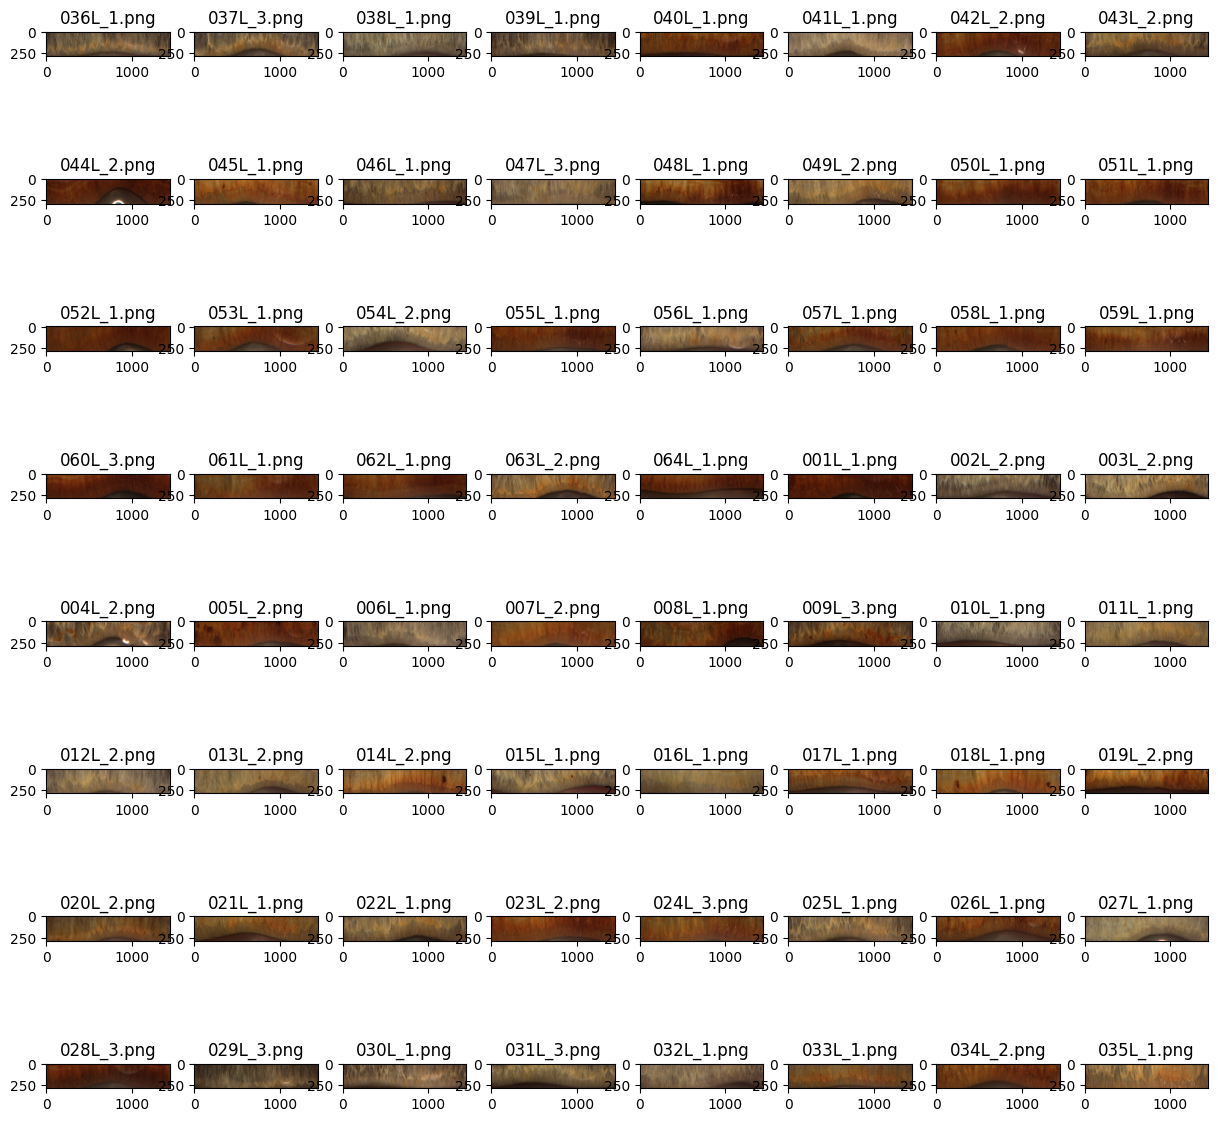

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# задаем путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/Dekart-Izm1'

# определяем количество столбцов и максимальное количество картинок
num_cols = 8
max_images = num_cols * num_cols

# создаем холст для отображения изображений
figure, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15,15))

image_counter = 0

# проходим по всем папкам в исходной директории
for dirpath, dirnames, filenames in os.walk(folder_path):
    # если достигли максимального количества изображений, выходим из цикла
    if image_counter >= max_images:
        break
    # если в папке есть файлы, выводим первый из них
    if len(filenames) > 0:
        selected_file = filenames[0]
        # выводим картинку на холст
        file_path = os.path.join(dirpath, selected_file)
        image = Image.open(file_path)
        axes[image_counter // num_cols, image_counter % num_cols].imshow(image)
        axes[image_counter // num_cols, image_counter % num_cols].set_title(selected_file)
        image_counter += 1

# скрываем пустые ячейки на холсте
for i in range(image_counter, max_images):
    axes[i // num_cols, i % num_cols].axis('off')

plt.show()

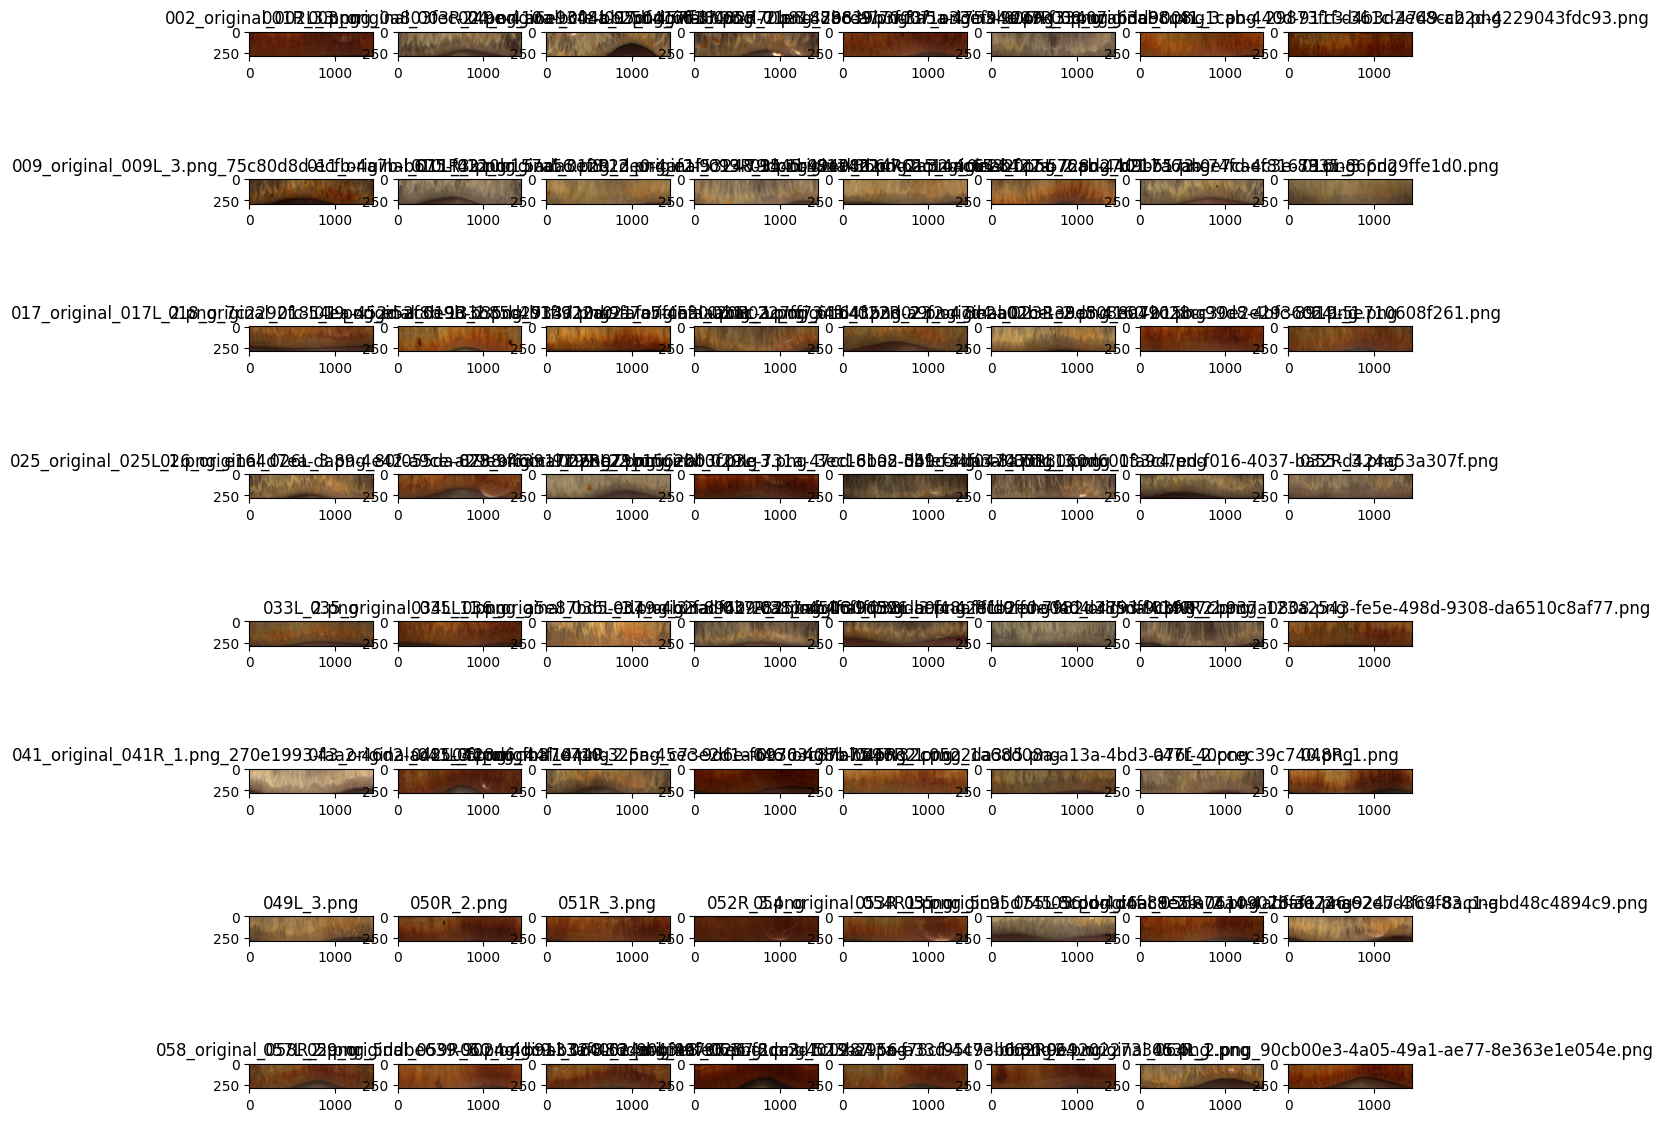

In [ ]:
# задаем путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/test-Izm1'

# определяем количество столбцов и максимальное количество картинок
num_cols = 8
max_images = num_cols * num_cols

# создаем холст для отображения изображений
figure, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15,15))

image_counter = 0

# проходим по всем папкам в исходной директории
for dirpath, dirnames, filenames in os.walk(folder_path):
    # если достигли максимального количества изображений, выходим из цикла
    if image_counter >= max_images:
        break
    # если в папке есть файлы, выводим первый из них
    if len(filenames) > 0:
        selected_file = filenames[0]
        # выводим картинку на холст
        file_path = os.path.join(dirpath, selected_file)
        image = Image.open(file_path)
        axes[image_counter // num_cols, image_counter % num_cols].imshow(image)
        axes[image_counter // num_cols, image_counter % num_cols].set_title(selected_file)
        image_counter += 1

# скрываем пустые ячейки на холсте
for i in range(image_counter, max_images):
    axes[i // num_cols, i % num_cols].axis('off')

plt.show()

##Функция применения фильтра Гаусса и оператора Лапласа

In [ ]:
import math

def ring_to_rect(image):
  """
  Данная функция для развертки круга в плоскость
  :param image: входное изображение типа numpy.ndarray
  :return: развернутое изображение типа numpy.ndarray
  """
  size = image.shape[0]  # размер изображения
  
  outer_radius = size // 2.5  # внешний радиус
  inner_radius_factor = 0.375  # коэффициент внутреннего радиуса относительно внешнего
  
  # Разворачиваем кольцо  
  warped = cv2.warpPolar(image, (size, int(size * math.pi)), (size // 2, size // 2), outer_radius, 0)  
  # Поворачиваем на 90 градусов  
  straightened = cv2.rotate(warped, cv2.ROTATE_90_COUNTERCLOCKWISE)  
  # Обрезаем  
  cropped = straightened[: int(straightened.shape[0] * (1 - inner_radius_factor)), :]  
  
  return cropped

# Проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)

    # Если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Загружаем изображение
                img = cv2.imread(file_path)

                # Производим развертку изображения в плоскость
                img_rect = ring_to_rect(img)

                # Сохраняем изображение в папку
                cv2.imwrite(os.path.join(folder_path, filename), img_rect)

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

def apply_gaussian_laplacian(image):
    ddepth = cv2.CV_16S
    kernel_size = 7
    #фильтр Гаусса с размером ядра (3,3) для сглаживания изображения.
    image = cv2.GaussianBlur(image, (3, 3), 0) 
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #используя оператор Лапласа с ядром размера 7, производится детектирование границ на изображении
    image = cv2.Laplacian(image, ddepth, ksize=kernel_size)
    # полученное изображение приводится к беззнаковому типу данных
    image = cv2.convertScaleAbs(image)
    
    # Возвращаем изображение с примененными фильтром и оператором
    return image

# Функция извлечения признаков из изображения с помощью вейвлетов Габора

def gabor_features(image, ksize=31, sigma=5, theta=0, lambd=10, gamma=0.5):
    """
    Извлекает функции Габора из входного изображения в градациях серого с использованием фильтров Габора.
    :param image: Входное изображение в оттенках серого в виде массива NumPy.
    :param ksize: Размер ядра фильтра Габора.
    :param sigma: Стандартное отклонение конверта Гаусса.
    :param theta: Ориентация фильтра Габора в градусах.
    :param lambd: Длина волны синусоидального фактора.
    :param gamma: Пространственное соотношение сторон.
    :return: Обработанное изображение.
    """
    # Создаем ядро фильтра Габора
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)

    # Применияем фильтр Габора к входному изображению
    filtered = cv2.filter2D(image, cv2.CV_32F, kernel)

    # Вычисляем среднее значение и стандартное отклонение отфильтрованного изображения
    # mean, std = cv2.meanStdDev(filtered)

    # Нормализуем отфильтрованное изображение
    # normalized = (filtered - mean) / std

    # Вычисляем величину и фазу сложного отклика вейвлета
    # magnitude, phase = cv2.cartToPolar(np.real(normalized), np.imag(normalized))

    # Вычисляем среднее значение и стандартное отклонение изображения магнитуды
    # mean_mag, std_mag = cv2.meanStdDev(magnitude)

    # Вычисляем среднее значение и стандартное отклонение фазового изображения
    # mean_phase, std_phase = cv2.meanStdDev(phase)

    # Объединяем вектор признаков
    # feature_vector = np.concatenate((mean_mag, std_mag, mean_phase, std_phase))

    # Преобразуем вектора признаков в изображение
    # img_size = int(np.sqrt(len(feature_vector)))
    # feature_image = feature_vector.reshape((img_size, img_size))

    return filtered
# Папка с папками картинок, рассортированных по категориям
dir_path = '/content/drive/MyDrive/Dekart/Dekart64_Gabor'
# Новая папка для сохранения результатов
new_dir_path =  '/content/drive/MyDrive/Dekart/Gabor'

# Создаем новую папку, если её ещё нет
if not os.path.exists(new_dir_path):
    os.mkdir(new_dir_path)

# Проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)

    # Если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        new_folder_path = os.path.join(new_dir_path, foldername)
        
        # Создаем новую папку для сохранения результатов, если ее еще нет
        if not os.path.exists(new_folder_path):
            os.mkdir(new_folder_path)
        
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Загружаем изображение
                img = cv2.imread(file_path)
                
                img = apply_gaussian_laplacian(img)

                # Производим развертку изображения в плоскость
                img_rect = gabor_features(img, ksize=31, sigma=5, theta=0, lambd=11, gamma=0.2)

                # Сохраняем изображение в новой папке
                cv2.imwrite(os.path.join(new_folder_path, filename), img_rect)

                # Вывод изображения на экран
                #cv2_imshow(img_rect)
                #cv2.waitKey(0)
                #cv2.destroyAllWindows()

In [ ]:

# Создание функции выделения круглой части изображения
def crop_circle(image_path):  
    # Прочитаем изображение
    img = cv2.imread(image_path)

    # Определим центр изображения и радиус круга
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    radius = min(center[0], center[1])

    # Создаем маску круга
    mask = np.zeros((height, width), np.uint8)
    cv2.circle(mask, center, radius, (255, 255, 255), -1, cv2.LINE_AA)

    # Применим маску к изображению и вырежем круглую часть
    result = np.zeros_like(img, np.uint8)
    result[mask == 255] = img[mask == 255]

    return result

# Создание пустых списков для изображения и меток
images = []
labels = []
label_dict = {}

# Получение списка папок и подсчет количества классов
class_folders = os.listdir(dir_path)
num_classes = len(class_folders)

# Создание словаря меток
for i, class_folder in enumerate(class_folders):
    label_dict[class_folder] = i

# проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
  folder_path = os.path.join(dir_path, foldername)
  
  # если текущий элемент - папка, проходим по файлам внутри
  if os.path.isdir(folder_path):
    for filename in os.listdir(folder_path):
      file_path = os.path.join(folder_path, filename)

      # проверяем, что файл является изображением
      if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # загружаем изображение
        img = cv2.imread(file_path)

# Проход по всем изображениям и добавление их в список images
for class_folder in class_folders:
    class_path = os.path.join(dir_path, class_folder)
    for img_file in os.listdir(class_path):
        # Пропустим файлы, которые не являются изображениями
              # проверяем, что файл является изображением
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img_path = os.path.join(class_path, img_file)
            # Преобразование изображения и добавление его в список
            img = crop_circle(img_path)
            images.append(img)
            # Добавление метки в список labels
            label = label_dict[class_folder]
            labels.append(label)

# Преобразование списков в массивы numpy
images = np.array(images)
labels = np.array(labels)

# Вывод информации о количестве классов и изображений
print(f"Количество классов: {num_classes}")
print(f"Общее количество изображений: {len(images)}")

In [ ]:
#Классифицируем изображения 

# Получаем список всех файлов в папке и ее подпапках
file_list = []
for root, dirs, files in os.walk(output_path):
    for file in files:
        file_list.append(os.path.join(root, file))

# Итерируемся по всем файлам и извлекаем числа из имен файлов
labels = []    
iris_images = []  

for file_path in file_list:
    # Получаем имя файла без расширения
    filename = os.path.splitext(os.path.basename(file_path))[0]
    fileext = os.path.splitext(os.path.basename(file_path))[1]
    # Получаем первые три числа из имени файла и убираем ведущие нули
    patient_num = int(''.join(filter(str.isdigit, filename))[:3])
    iris_images.append(file_path)
    labels.append(patient_num)



In [ ]:
print('В массив собрано ', len(iris_images), ' фотографий')
print(iris_images)
print(labels)

В массив собрано  1084  фотографий
['/content/drive/MyDrive/Dekart/Dekart64/001/001L_1.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001L_2.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001L_3.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001R_1.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001R_2.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001R_3.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001_original_001L_2.png_5224a708-e9ce-4ccc-abaa-61c29b190f80.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001_original_001R_3.png_241c0b2b-d12e-4bd6-b8ff-3a0df79c12f7.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001_original_001R_2.png_8505d83e-3f33-4020-82eb-d7fcbf3eaec1.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001_original_001R_1.png_9df30ab6-a0c5-423e-8d77-41924abbf864.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001_original_001R_2.png_829e4125-d849-4c5a-a00b-2c015220c5a1.png', '/content/drive/MyDrive/Dekart/Dekart64/001/001_original_001R_3.png

In [ ]:
def cut_black_edges(img):

    # Преобразуйте изображение в оттенки серого
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Пороговое значение изображения для создания бинарной маски из черных пикселей
    mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]

    # Найдите верхний и нижний края изображения, содержащие черные пиксели
    top = 0
    bottom = img.shape[0] - 1
    for i in range(img.shape[0]):
        if cv2.countNonZero(mask[i, :]) > 0:
            top = i
            break
    for i in range(img.shape[0] - 1, -1, -1):
        if cv2.countNonZero(mask[i, :]) > 0:
            bottom = i
            break

    # Обрезайте изображение, чтобы удалить черные края
    return img[top:bottom+1, :]

In [ ]:

def crop_circle(image_path):  
    # Прочитаем изображение
    img = cv2.imread(image_path)

    # Определим центр изображения и радиус круга
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    radius = min(center[0], center[1])

    # Создаем маску круга
    mask = np.zeros((height, width), np.uint8)
    cv2.circle(mask, center, radius, (255, 255, 255), -1, cv2.LINE_AA)

    # Применим маску к изображению и вырежем круглую часть
    result = np.zeros_like(img, np.uint8)
    result[mask == 255] = img[mask == 255]

    cv2.imshow('Circle image', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


img_path = dir_path
crop_circle(img_path)

AttributeError: ignored

In [ ]:
from google.colab.patches import cv2_imshow

def crop_white_corners(img):
    """
    Обрезает углы на изображении, содержащие пустые области заданного цвета.

    Args:
        img: входное изображение

    Returns:
        измененное изображение
    """
    # функция обрезки углов изображения

    (h, w) = img.shape[:2]
    ratio = w / h
  
    for i in range(0, h):
        if not all(j == 255 for j in img[i, 0]):
            y0 = i
            break
    for i in range(h - 1, -1, -1):
        if not all(j == 255 for j in img[i, 0]):
            y1 = i
            break
    for i in range(0, w):
        if not all(j == 255 for j in img[0, i]):
            x0 = i
            break
    for i in range(w - 1, -1, -1):
        if not all(j == 255 for j in img[0, i]):
            x1 = i
            break
          
    y_sub = y1 - y0
    x_sub = x1 - x0
  
    if y_sub > x_sub:
        delta = y_sub - x_sub
        delta = delta if delta % 2 == 0 else delta + 1
        x0 -= delta // 2
        x1 += delta // 2
    if y_sub < x_sub:
        delta = x_sub - y_sub
        delta = delta if delta % 2 == 0 else delta + 1
        y0 -= delta // 2
        y1 += delta // 2
     
    return img[y0:y1, x0:x1]

def cartesian_warp(img):
    """
    Выполняет переход к декартову изображению.

    Args:
        img: входное изображение

    Returns:
        измененное изображение
    """
    # преобразуем картинку в оттенки серого

    height, width, _ = img.shape
    cart_warp = cv2.warpAffine(img, 
                               cv2.getRotationMatrix2D((width//2, height//2), 0, 1.4), 
                               (width*2, height))
    return cart_warp

# проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
  
    # если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # загружаем изображение
                img = cv2.imread(file_path)
                # проверяем, что изображение успешно загружено
                if img is not None:
                    # обрезаем углы светлого цвета на изображении
                    img_cropped = crop_white_corners(img)
                    
                    # проверяем, что размеры обрезанного изображения больше нуля
                    if img_cropped.shape[0] > 0 and img_cropped.shape[1] > 0:
                        # определяем размеры изображения
                        rows, cols = img_cropped.shape[:2]

                        # определяем матрицу преобразования для поворота изображения на 90 градусов
                        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 0, 1.45)

                        # преобразование изображения
                        dst = cv2.warpAffine(img_cropped, M, (cols, rows))

                        # отображение и сохранение изображения
                        cv2_imshow(dst)
                        cv2.imwrite('result.jpg', dst)
                        cv2.waitKey(0)
                        cv2.destroyAllWindows() # закрыть созданные окна
                    else:
                        print("Ошибка обрезки изображения: размеры изображения равны 0.")
                else:
                    print("Ошибка загрузки изображения.")

error: ignored

In [ ]:
from google.colab.patches import cv2_imshow
def crop_white_corners(img):
    """
    Обрезает углы светлого цвета на изображении.

    Args:
        img: входное изображение

    Returns:
        измененное изображение
    """
    # преобразуем картинку в оттенки серого
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # применяем пороговое значение для выделения белых углов на изображении
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # находим контуры на изображении
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # определяем координаты границ области с белыми углами на изображении
    x_min, y_min, x_max, y_max = float('inf'), float('inf'), -float('inf'), -float('inf')
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)

    # обрезаем изображение по найденным границам
    img_cropped = img[y_min:y_max, x_min:x_max]

    return img_cropped

def cartesian_warp(img):
    """
    Выполняет переход к декартову изображению.

    Args:
        img: входное изображение

    Returns:
        измененное изображение
    """
    # преобразуем картинку в оттенки серого

    height, width, _ = img.shape
    cart_warp = cv2.warpAffine(img, 
                               cv2.getRotationMatrix2D((width//2, height//2), 0, 1.4), 
                               (width*2, height))
    return cart_warp

# проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)
  
    # если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # загружаем изображение
                img = cv2.imread(file_path)
                # проверяем, что изображение успешно загружено
                if img is not None:
                    # обрезаем углы светлого цвета на изображении
                    img_cropped = crop_white_corners(img)
                    
                    # проверяем, что размеры обрезанного изображения больше нуля
                    if img_cropped.shape[0] > 0 and img_cropped.shape[1] > 0:
                        # определяем размеры изображения
                        rows, cols = img_cropped.shape[:2]

                        # определяем матрицу преобразования для поворота изображения на 0 градусов
                        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 0, 1.45)

                        # преобразование изображения
                        dst = cv2.warpAffine(img_cropped, M, (cols, rows))

                        # отображение и сохранение изображения
                        cv2_imshow(dst)
                        cv2.imwrite('result.jpg', dst)
                        cv2.waitKey(0)
                        cv2.destroyAllWindows() # закрыть созданные окна
                    else:
                        print("Ошибка обрезки изображения: размеры изображения равны 0.")
                else:
                    print("Ошибка загрузки изображения.")

TypeError: ignored

In [ ]:
# Указываем путь к архиву и название папки, в которую нужно распаковать
zip_path = "/content/drive/MyDrive/Iris.zip"
dir_path = "Iris"

# Распаковываем архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dir_path)

'''    
    Код сначала распакует архив в папку "Iris", затем для каждой подпапки в этой 
    папке создаст генератор аугментации и применит к нему набор аугментационных 
    операций, сохраняя измененные изображения в подпапку с суффиксом "_augmented".
    В каждой папке содержится по 6 изображений
'''
# Применяем аугментацию к каждой папке с изображениями
for folder in os.listdir(dir_path):
    if os.path.isdir(os.path.join(dir_path, folder)):
        # Создаем генератор аугментации для каждой папки
        p = Augmentor.Pipeline(os.path.join(dir_path, folder), output_directory=os.path.join('/content/drive/MyDrive/Iris2', folder))
        # Добавляем операции аугментации
        # Вращение изображения
        p.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
        # увеличение
        #p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
        # Обрезание изображения
        #p.crop_random(probability=0.1, percentage_area=0.2)
        # Изменение яркости
        p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.2)
        # Изменение сонтрасности
        p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.2)
        # Применяем аугментацию
        p.sample(16)
        print(folder, '- Аугментация завершена')


## Архивируем данные после проверки визуально, что насоздавала аугментация


In [ ]:
def create_archive(folder_path, archive_path):
    """Функция для создания архива папки"""
    with zipfile.ZipFile(archive_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file))

# Путь до папки с результатами
folder_path = '/content/drive/MyDrive/Iris2'

# Путь до создаваемого архива
archive_path = '/content/drive/MyDrive/Iris2.zip'

# Создание архива
create_archive(folder_path, archive_path)

## анализ результата

In [ ]:
data_dir = '/content/drive/MyDrive/Dekart/test-Izm1'

# Получение списка папок в каталоге
folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Показ по одной фотографии из каждой папки
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_names = [name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
    if len(image_names) > 0:
        first_image_path = os.path.join(folder_path, image_names[0])
        image = Image.open(first_image_path)
        print(f"Image: {os.path.basename(first_image_path)}, Size: {image.size}")
        image.show()


In [ ]:
data_dir = '/content/drive/MyDrive/Dekart/Dekart-Izm1'

# Получение списка папок в каталоге
folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Показ по одной фотографии из каждой папки
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_names = [name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
    if len(image_names) > 0:
        first_image_path = os.path.join(folder_path, image_names[0])
        image = Image.open(first_image_path)
        print(f"Image: {os.path.basename(first_image_path)}, Size: {image.size}")
        image.show()

In [ ]:
# Эта команда распакует архив в папку `/content/Iris2/`
#!unzip -qo "/content/drive/MyDrive/Dekart/Iris.zip" -d /content/drive/MyDrive/Dekart/Dekart64
#!unzip -qo "/content/drive/MyDrive/Dekart/Dekart64/Iris1920x1080.zip" -d /content/drive/MyDrive/Dekart/Dekart64
IMAGE_PATH = '/content/drive/MyDrive/Dekart/Gabor' #+ '/content/drive/MyDrive/Dekart/Dekart64/'

Теперь вы можете увидеть, что находится в загруженной базе. Для этого функцией `listdir()` из модуля **os** получите список папок по адресу **IMAGE_PATH**:

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/Dekart/Dekart-Izm1'
# Получите список папок
os.listdir(IMAGE_PATH)

['036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035']

Здесь видно, что файлы распределены по папкам, при этом названия папок соответствуют именам классов (маркам авто). Поэтому зададим список классов из списка папок. Функция `listdir()` возвращает список папок в неопределенном порядке, поэтому список классов желательно отсортировать, чтобы имена классов всегда шли в одном порядке. Метками классов будут индексы имен классов в списке классов. Количество классов определим как длину списка классов.

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064']


In [ ]:
i = 0

# Формирование пути к выборке одной марки авто
f'{IMAGE_PATH}{CLASS_LIST[i]}/'

'/content/drive/MyDrive/Dekart/Dekart-Izm1001/'

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `imshow()` из модуля **matplotlib.pyplot**).

Для этого импортируем необходимые библиотеки, создадим заготовку для изображений всех классов.

Далее в цикле переберем все классы. Сформируем путь к классу, выберем из него один случайный экземпляр (при помощи функции `random.choice()`) и отобразим его в ячейке (получим содержимое картинки при помощи функции `open()` из модуля **Image**).

In [ ]:
data_dir = '/content/drive/MyDrive/Dekart/Dekart-Izm1'

# Получение списка папок в каталоге
folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Показ по одной фотографии из каждой папки
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_names = [name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
    if len(image_names) > 0:
        first_image_path = os.path.join(folder_path, image_names[0])
        image = Image.open(first_image_path)
        print(f"Image: {os.path.basename(first_image_path)}, Size: {image.size}")
        image.show()

## Изображения

Для выполнения задачи нужно выполнить следующие шаги:

Импортировать модуль os для работы с файловой системой.
Создать два пустых списка: один для хранения путей к файлам изображений, а другой для хранения меток классов (названий папок).
Получить список папок, содержащихся в директории 'construction'.
Для каждой папки пройтись по всем файлам внутри нее и добавить путь к файлу в первый список, а метку (название категории) во второй список.
Вывести на экран количество изображений в каждой папке и имя папки.
Вот код для выполнения всех этих шагов:

In [ ]:
# Создаем пустые списки для хранения путей к файлам изображений и меток классов
image_paths = []
labels = []

# Получаем список папок, содержащихся в директории '/Iris/'
dir_path = '/content/drive/MyDrive/Dekart/Dekart-Izm1'
categories = os.listdir(dir_path)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in categories:
    category_path = os.path.join(dir_path, category)
    if os.path.isdir(category_path):
        files = os.listdir(category_path)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name in files:
            file_path = os.path.join(category_path, file_name)
            image_paths.append(file_path)
            labels.append(category)

# Выводим результаты
print("Total number of images:", len(image_paths))
print("Total number of labels:", len(labels))


Number of images in '001': 16
Number of images in '002': 16
Number of images in '003': 16
Number of images in '004': 16
Number of images in '005': 16
Number of images in '006': 16
Number of images in '007': 16
Number of images in '008': 16
Number of images in '009': 16
Number of images in '010': 16
Number of images in '011': 16
Number of images in '012': 16
Number of images in '013': 16
Number of images in '014': 16
Number of images in '015': 16
Number of images in '016': 16
Number of images in '017': 16
Number of images in '018': 16
Number of images in '019': 16
Number of images in '020': 16
Number of images in '021': 16
Number of images in '022': 16
Number of images in '023': 16
Number of images in '024': 16
Number of images in '025': 16
Number of images in '026': 16
Number of images in '027': 16
Number of images in '028': 16
Number of images in '029': 16
Number of images in '030': 16
Number of images in '031': 16
Number of images in '032': 16
Number of images in '033': 16
Number of 

In [ ]:
# Создаем пустые списки для хранения путей к файлам изображений и меток классов
test_image_paths = []
test_labels = []

# Получаем список папок, содержащихся в директории '/content/drive/MyDrive/Dekart/test-Izm1'
test_dir_path = '/content/drive/MyDrive/Dekart/test-Izm1'
test_categories = os.listdir(test_dir_path)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in test_categories:
    category_path = os.path.join(test_dir_path, category)
    if os.path.isdir(category_path):
        files = os.listdir(category_path)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name in files:
            file_path = os.path.join(category_path, file_name)
            test_image_paths.append(file_path)
            test_labels.append(category)

# Выводим результаты
print("Total number of test images:", len(test_image_paths))
print("Total number of test labels:", len(test_labels))

Number of images in '001': 1
Number of images in '002': 1
Number of images in '003': 1
Number of images in '004': 1
Number of images in '005': 1
Number of images in '006': 1
Number of images in '007': 1
Number of images in '008': 1
Number of images in '009': 1
Number of images in '010': 1
Number of images in '011': 1
Number of images in '012': 1
Number of images in '013': 1
Number of images in '014': 1
Number of images in '015': 1
Number of images in '016': 1
Number of images in '017': 1
Number of images in '018': 1
Number of images in '019': 1
Number of images in '020': 1
Number of images in '021': 1
Number of images in '022': 1
Number of images in '023': 1
Number of images in '024': 1
Number of images in '025': 1
Number of images in '026': 1
Number of images in '027': 1
Number of images in '028': 1
Number of images in '029': 1
Number of images in '030': 1
Number of images in '031': 1
Number of images in '032': 1
Number of images in '033': 1
Number of images in '034': 1
Number of imag

In [ ]:

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Выводим результат
print(onehot_encoded)

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
test_label_encoder = LabelEncoder()
test_integer_encoded = test_label_encoder.fit_transform(test_labels)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
test_onehot_encoder = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
test_onehot_encoded = test_onehot_encoder.fit_transform(test_integer_encoded)

# Выводим результат
print(test_onehot_encoded)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Этот код сначала создает экземпляр LabelEncoder, который преобразует лейблы в числовой формат. Затем создается экземпляр OneHotEncoder, который преобразует числовые значения в формат One-Hot Encoding. Наконец, преобразованные данные выводятся на экран.

In [ ]:
onehot_encoded[56]
test_onehot_encoded[56]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

Для выполнения задачи нужно выполнить следующие шаги:

Импортировать модули numpy и Image из библиотеки Pillow.
Создать пустой список для изображений.
Пройтись по списку image_paths, открыв каждое изображение, приведя его к формату 64 на 64 пикселя и добавив его в пустой список в виде numpy массива.
После окончания всех итераций, перевести созданный список в формат numpy массива.
Cписок меток классов  перевести в формат numpy массива.
Вот код для выполнения всех этих шагов:

In [ ]:
# Создаем пустой список для изображений
images128 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths:
    with Image.open(path) as img:
        img = img.resize((128, 128)) # изменяем размер изображения до 64x64 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        images128.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
images128 = np.array(images128)

# Преобразуем список меток классов в формат numpy массива

labels_onehot128 = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", images128.shape)
print("Shape of labels array:", labels_onehot128.shape)

images64 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths:
    with Image.open(path) as img:
        img = img.resize((64, 64)) # изменяем размер изображения до 64x64 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        images64.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
images64 = np.array(images64)

# Преобразуем список меток классов в формат numpy массива

labels_onehot64 = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", images64.shape)
print("Shape of labels array:", labels_onehot64.shape)

imagesALL = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths:
    with Image.open(path) as img:        
        img = img.resize((901, 179)) # изменяем размер изображения до 64x64 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива без изменения размера
        imagesALL.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
imagesALL = np.array(imagesALL)

# Преобразуем список меток классов в формат numpy массива

labels_onehotALL = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", imagesALL.shape)
print("Shape of labels array:", labels_onehotALL.shape)

Shape of images array: (1024, 128, 128, 3)
Shape of labels array: (1024, 64)
Shape of images array: (1024, 64, 64, 3)
Shape of labels array: (1024, 64)
Shape of images array: (1024, 179, 901, 3)
Shape of labels array: (1024, 64)


In [ ]:
# Создаем пустой список для изображений
test_images128 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in test_image_paths:
    with Image.open(path) as img:
        img = img.resize((128, 128)) # изменяем размер изображения до 128x128 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        test_images128.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
test_images128 = np.array(test_images128)

# Преобразуем список меток классов в формат numpy массива
test_labels_onehot128 = np.array(test_onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of test images array:", test_images128.shape)
print("Shape of test labels array:", test_labels_onehot128.shape)

# Создаем пустой список для изображений
test_images64 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in test_image_paths:
    with Image.open(path) as img:
        img = img.resize((64, 64)) # изменяем размер изображения до 128x128 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        test_images64.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
test_images64 = np.array(test_images64)

# Преобразуем список меток классов в формат numpy массива
test_labels_onehot64 = np.array(test_onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of test images array:", test_images64.shape)
print("Shape of test labels array:", test_labels_onehot64.shape)
# Создаем пустой список для изображений
test_imagesALL = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in test_image_paths:
    with Image.open(path) as img:
        img = img.resize((901, 179)) # изменяем размер изображения до 128x128 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        test_imagesALL.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
test_imagesALL = np.array(test_imagesALL)

# Преобразуем список меток классов в формат numpy массива
test_labels_onehotALL = np.array(test_onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of test images array:", test_imagesALL.shape)
print("Shape of test labels array:", test_labels_onehotALL.shape)

Shape of test images array: (64, 128, 128, 3)
Shape of test labels array: (64, 64)
Shape of test images array: (64, 64, 64, 3)
Shape of test labels array: (64, 64)
Shape of test images array: (64, 179, 901, 3)
Shape of test labels array: (64, 64)


In [ ]:
# Нормируем массив изображений
test_images_normalized64 = test_images64   / 255.0
test_images_normalized128 = test_images128 / 255.0
test_images_normalizedALL = test_imagesALL / 255.0
images_normalized64       = images64       / 255.0
images_normalized128      = images128      / 255.0
images_normalizedALL      = imagesALL      / 255.0

# Выводим результат
print(test_images_normalized64[0])
print(test_images_normalized128[0])
print(test_images_normalizedALL[0])
print(images_normalized64[0])
print(images_normalized128[0])
print(images_normalizedALL[0])

[[[0.26666667 0.0745098  0.02352941]
  [0.27843137 0.08235294 0.02352941]
  [0.3372549  0.09803922 0.03137255]
  ...
  [0.29411765 0.09019608 0.02745098]
  [0.32156863 0.10980392 0.03137255]
  [0.34509804 0.11372549 0.03137255]]

 [[0.2627451  0.06666667 0.02352941]
  [0.2745098  0.0745098  0.02352941]
  [0.33333333 0.09803922 0.02745098]
  ...
  [0.28627451 0.08627451 0.02745098]
  [0.31372549 0.09803922 0.03529412]
  [0.3372549  0.10980392 0.03137255]]

 [[0.27058824 0.0745098  0.02352941]
  [0.27843137 0.07843137 0.02352941]
  [0.33333333 0.09803922 0.02745098]
  ...
  [0.27843137 0.07843137 0.02352941]
  [0.30980392 0.09411765 0.03137255]
  [0.3372549  0.10588235 0.03137255]]

 ...

 [[0.30196078 0.12941176 0.0627451 ]
  [0.29803922 0.1254902  0.0627451 ]
  [0.30980392 0.1254902  0.05882353]
  ...
  [0.30196078 0.1254902  0.05882353]
  [0.30588235 0.1254902  0.0627451 ]
  [0.31764706 0.1372549  0.0627451 ]]

 [[0.29411765 0.1254902  0.05882353]
  [0.29803922 0.1254902  0.0627451 ]


In [ ]:
# Разделяем данные на тренировочную и тестовую выборки
x_train128_g, x_val128_g, y_train128_g, y_val128_g = train_test_split(images128, labels_onehot128, test_size=0.2, stratify=labels_onehot128)
x_test128_g, y_test128_g =  test_images128, test_labels_onehot128
# Выводим размеры тренировочной и тестовой выборок
print("X_train shape:", x_train128_g.shape)
print("y_train shape:", y_train128_g.shape)
print("X_val shape:", x_val128_g.shape)
print("y_val shape:", y_val128_g.shape)
print("X_test shape:", x_test128_g.shape)
print("y_test shape:", y_test128_g.shape)

X_train shape: (819, 128, 128, 3)
y_train shape: (819, 64)
X_val shape: (205, 128, 128, 3)
y_val shape: (205, 64)
X_test shape: (64, 128, 128, 3)
y_test shape: (64, 64)


In [ ]:
# Разделяем данные на тренировочную и тестовую выборки
x_train64_g, x_val64_g, y_train64_g, y_val64_g = train_test_split(images64, labels_onehot64, test_size=0.2, stratify=labels_onehot64)
x_test64_g, y_test64_g =  test_images64, test_labels_onehot64
# Выводим размеры тренировочной и тестовой выборок
print("X_train shape:", x_train64_g.shape)
print("y_train shape:", y_train64_g.shape)
print("X_val shape:", x_val64_g.shape)
print("y_val shape:", y_val64_g.shape)
print("X_test shape:", x_test64_g.shape)
print("y_test shape:", y_test64_g.shape)


X_train shape: (819, 64, 64, 3)
y_train shape: (819, 64)
X_val shape: (205, 64, 64, 3)
y_val shape: (205, 64)
X_test shape: (64, 64, 64, 3)
y_test shape: (64, 64)


In [ ]:
# Разделяем данные на тренировочную и тестовую выборки
x_train_g, x_val_g, y_train_g, y_val_g = train_test_split(imagesALL, labels_onehotALL, test_size=0.2, stratify=labels_onehotALL)
x_test_g, y_test_g =  test_imagesALL, test_labels_onehotALL
# Выводим размеры тренировочной и тестовой выборок
print("X_train shape:", x_train_g.shape)
print("y_train shape:", y_train_g.shape)
print("X_val shape:", x_val_g.shape)
print("y_val shape:", y_val_g.shape)
print("X_test shape:", x_test_g.shape)
print("y_test shape:", y_test_g.shape)


X_train shape: (819, 179, 901, 3)
y_train shape: (819, 64)
X_val shape: (205, 179, 901, 3)
y_val shape: (205, 64)
X_test shape: (64, 179, 901, 3)
y_test shape: (64, 64)


# Cохранение и дальнейшая загрузка данных для создания нейронных сетей 

In [ ]:
np.save('/content/drive/MyDrive/Dekart/x_train128_g'    , x_train128_g)
np.save('/content/drive/MyDrive/Dekart/y_train128_g'    , y_train128_g)
np.save('/content/drive/MyDrive/Dekart/x_val128_g'      , x_val128_g)
np.save('/content/drive/MyDrive/Dekart/y_val128_g'      , y_val128_g)
np.save('/content/drive/MyDrive/Dekart/x_test128_g'     , x_test128_g)
np.save('/content/drive/MyDrive/Dekart/y_test128_g'     , y_test128_g)

np.save('/content/drive/MyDrive/Dekart/x_train64_g'    , x_train64_g)
np.save('/content/drive/MyDrive/Dekart/y_train64_g'    , y_train64_g)
np.save('/content/drive/MyDrive/Dekart/x_val64_g'      , x_val64_g)
np.save('/content/drive/MyDrive/Dekart/y_val64_g'      , y_val64_g)
np.save('/content/drive/MyDrive/Dekart/x_test64_g'     , x_test64_g)
np.save('/content/drive/MyDrive/Dekart/y_test64_g'      , y_test64_g)

np.save('/content/drive/MyDrive/Dekart/x_train_g'    , x_train_g)
np.save('/content/drive/MyDrive/Dekart/y_train_g'    , y_train_g)
np.save('/content/drive/MyDrive/Dekart/x_val_g'      , x_val_g)
np.save('/content/drive/MyDrive/Dekart/y_val_g'      , y_val_g)
np.save('/content/drive/MyDrive/Dekart/x_test_g'     , x_test_g)
np.save('/content/drive/MyDrive/Dekart/y_test_g'      , y_test_g)

In [ ]:
print("x_train shape:", x_train64_g.shape)
print("y_train shape:", y_train64_g.shape)
print("x_val shape:"  , x_val64_g.shape)
print("y_val shape:"  , y_val64_g.shape)
print("x_test shape:" , x_test64_g.shape)
print("y_test shape:" , y_test64_g.shape)
print("x_train shape:", x_train128_g.shape)
print("y_train shape:", y_train128_g.shape)
print("x_val shape:"  , x_val128_g.shape)
print("y_val shape:"  , y_val128_g.shape)
print("x_test shape:" , x_test128_g.shape)
print("y_test shape:" , y_test128_g.shape)
print("x_train shape:", x_train_g.shape)
print("y_train shape:", y_train_g.shape)
print("x_val shape:"  , x_val_g.shape)
print("y_val shape:"  , y_val_g.shape)
print("x_test shape:" , x_test_g.shape)
print("y_test shape:" , y_test_g.shape)

x_train shape: (819, 64, 64, 3)
y_train shape: (819, 64)
x_val shape: (205, 64, 64, 3)
y_val shape: (205, 64)
x_test shape: (64, 64, 64, 3)
y_test shape: (64, 64)
x_train shape: (819, 128, 128, 3)
y_train shape: (819, 64)
x_val shape: (205, 128, 128, 3)
y_val shape: (205, 64)
x_test shape: (64, 128, 128, 3)
y_test shape: (64, 64)
x_train shape: (819, 179, 901, 3)
y_train shape: (819, 64)
x_val shape: (205, 179, 901, 3)
y_val shape: (205, 64)
x_test shape: (64, 179, 901, 3)
y_test shape: (64, 64)


In [ ]:
x_train128_g =         np.load('/content/drive/MyDrive/Dekart/x_train128_g.npy')
y_train128_g =         np.load('/content/drive/MyDrive/Dekart/y_train128_g.npy')
x_val128_g   =         np.load('/content/drive/MyDrive/Dekart/x_val128_g.npy')
y_val128_g   =         np.load('/content/drive/MyDrive/Dekart/y_val128_g.npy')
x_test128_g  =         np.load('/content/drive/MyDrive/Dekart/x_test128_g.npy')
y_test128_g  =         np.load('/content/drive/MyDrive/Dekart/y_test128_g.npy')

x_train64_g  =         np.load('/content/drive/MyDrive/Dekart/x_train64_g.npy')
y_train64_g  =         np.load('/content/drive/MyDrive/Dekart/y_train64_g.npy')
x_val64_g    =         np.load('/content/drive/MyDrive/Dekart/x_val64_g.npy')
y_val64_g    =         np.load('/content/drive/MyDrive/Dekart/y_val64_g.npy')
x_test64_g   =         np.load('/content/drive/MyDrive/Dekart/x_test64_g.npy')
y_test64_g   =         np.load('/content/drive/MyDrive/Dekart/y_test64_g.npy')

x_train_g    =          np.load('/content/drive/MyDrive/Dekart/x_train_g.npy')
y_train_g    =          np.load('/content/drive/MyDrive/Dekart/y_train_g.npy')
x_val_g      =          np.load('/content/drive/MyDrive/Dekart/x_val_g.npy')
y_val_g      =          np.load('/content/drive/MyDrive/Dekart/y_val_g.npy')
x_test_g     =          np.load('/content/drive/MyDrive/Dekart/x_test_g.npy')
y_test_g     =          np.load('/content/drive/MyDrive/Dekart/y_test_g.npy')

#Начало экспериментов

Epoch 1/20
8/8 [==============================] - 3s 118ms/step - loss: 59.1247 - accuracy: 0.0161 - val_loss: 4.3309 - val_accuracy: 0.0000e+00
Epoch 2/20
8/8 [==============================] - 0s 19ms/step - loss: 4.2361 - accuracy: 0.0120 - val_loss: 4.1278 - val_accuracy: 0.0128
Epoch 3/20
8/8 [==============================] - 0s 19ms/step - loss: 4.1842 - accuracy: 0.0161 - val_loss: 4.1679 - val_accuracy: 0.0000e+00
Epoch 4/20
8/8 [==============================] - 0s 19ms/step - loss: 4.1565 - accuracy: 0.0241 - val_loss: 4.1560 - val_accuracy: 0.0256
Epoch 5/20
8/8 [==============================] - 0s 20ms/step - loss: 4.1568 - accuracy: 0.0201 - val_loss: 4.1553 - val_accuracy: 0.0128
Epoch 6/20
8/8 [==============================] - 0s 20ms/step - loss: 4.1437 - accuracy: 0.0241 - val_loss: 4.1764 - val_accuracy: 0.0385
Epoch 7/20
8/8 [==============================] - 0s 19ms/step - loss: 4.1366 - accuracy: 0.0201 - val_loss: 4.1453 - val_accuracy: 0.0128
Epoch 8/20
8/8 [=

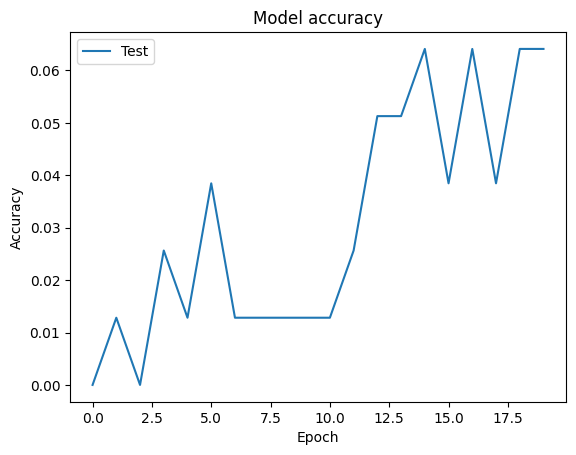

In [ ]:

# Создаем модель нейронной сети
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель на тренировочной выборке
history = model.fit(x_train128_, y_train128_, epochs=20, validation_data=(x_val128_, y_val128_))

# Строим график точности на проверочной выборке
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()


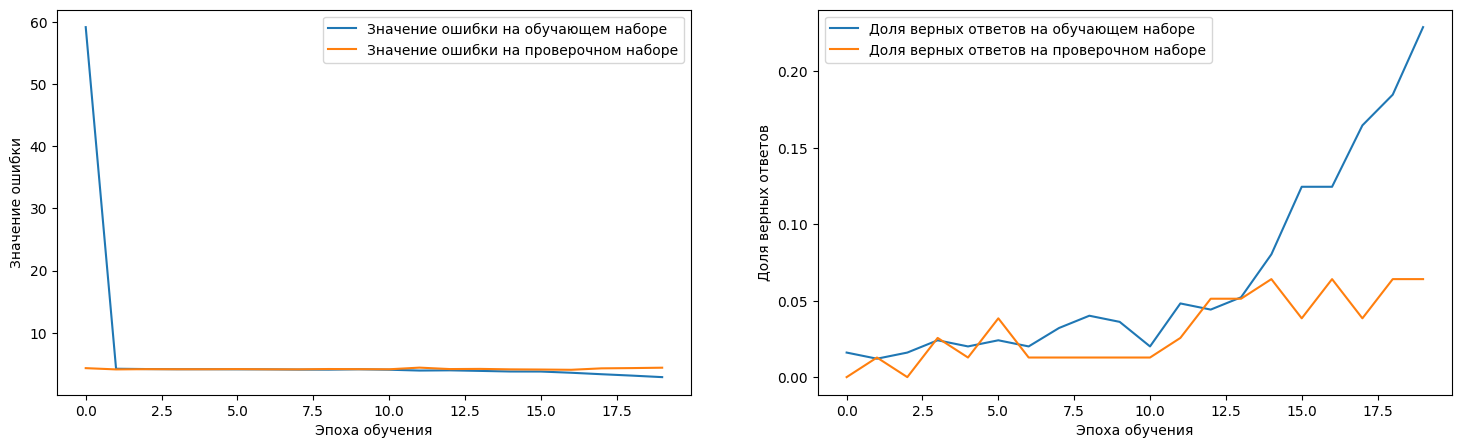

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря history.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря history.history
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
# Оценка точности модели на проверочной выборке
accuracy = model.evaluate(x_test128_, y_test128_)[1]
print("Accuracy on validation data:", accuracy)

2/2 [==============================] - 0s 227ms/step - loss: 4.5610 - accuracy: 0.1270
Accuracy on validation data: 0.1269841343164444


Epoch 1/20
8/8 [==============================] - 3s 92ms/step - loss: 40.5031 - accuracy: 0.0161 - val_loss: 4.8182 - val_accuracy: 0.0513
Epoch 2/20
8/8 [==============================] - 0s 14ms/step - loss: 4.3035 - accuracy: 0.0161 - val_loss: 4.1343 - val_accuracy: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 0s 14ms/step - loss: 4.1378 - accuracy: 0.0321 - val_loss: 4.1675 - val_accuracy: 0.0128
Epoch 4/20
8/8 [==============================] - 0s 14ms/step - loss: 4.0205 - accuracy: 0.0723 - val_loss: 4.1552 - val_accuracy: 0.0385
Epoch 5/20
8/8 [==============================] - 0s 14ms/step - loss: 3.8731 - accuracy: 0.0562 - val_loss: 4.0703 - val_accuracy: 0.0385
Epoch 6/20
8/8 [==============================] - 0s 14ms/step - loss: 3.5806 - accuracy: 0.1245 - val_loss: 4.1228 - val_accuracy: 0.0385
Epoch 7/20
8/8 [==============================] - 0s 14ms/step - loss: 3.4190 - accuracy: 0.1566 - val_loss: 4.0735 - val_accuracy: 0.0513
Epoch 8/20
8/8 [======

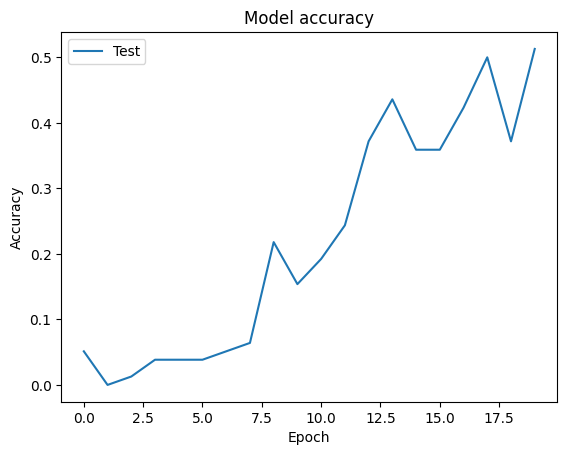

In [ ]:

# Создаем модель нейронной сети
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель на тренировочной выборке
history = model.fit(x_train64_, y_train64_, epochs=20, validation_data=(x_val64_, y_val64_))

# Вывод модели 
utils.plot_model(model, dpi=60)

plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()



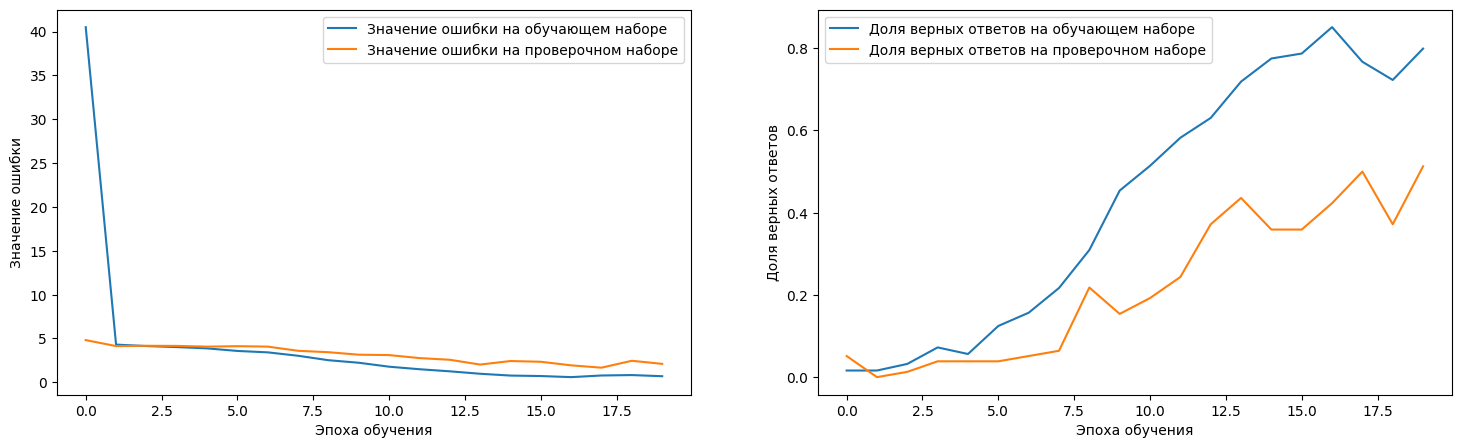

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря history.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря history.history
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
# Оценка точности модели на проверочной выборке
accuracy = model.evaluate(x_test64_, y_test64_)[1]
print("Accuracy on validation data:", accuracy)

#Получаем архитектуру модели и используемые в ней параметры

In [ ]:
importimportimportimport tensorflow as tf
import autokeras as ak
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создание экземпляра ImageClassifier с максимальным количеством попыток перебора гиперпараметров, равным 10
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=2,
    objective="val_accuracy"
)

# Обучение модели
history = clf.fit(
    x_train_g,
    y_train_g,
    validation_data=(x_val_g, y_val_g),
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=5,
        restore_best_weights=True
    )]
)

# Проверка точности модели на валидационном наборе данных
if history is not None and 'val_accuracy' in history.history:
    val_accuracy = history.history['val_accuracy'][-1]
    print('Validation accuracy:', val_accuracy)
else:
    val_accuracy = 0
    print('No history found.')

#if val_accuracy > 0.82:
    # Переобучение модели с уменьшением шага обучения на порядок и еще 50 эпох обучения
#    clf.tuner.search(
#        x_train_g,
#        y_train_g,
#        validation_data=(x_val_g, y_val_g),
#        epochs=50,
#        max_trials=3,
#        overwrite=True,
#        search_params=ak.AutoTuner.SEARCH_PARAMS_ADAPTIVE,
#        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)
#    )
#else:
#    print('Результат ниже')
    
# Сохранение модели в формате Tensorflow SavedModel
clf.export_model().save('/content/drive/MyDrive/Dekart/model_30.05.1_final')

# Создание экземпляра модели
best_model = clf.export_model()

# Загрузка весов модели
best_model.load_weights('/content/drive/MyDrive/Dekart/model_30.05.1_final')

# Выполнение предсказаний на тестовой выборке
y_pred = best_model.predict(x_test_g)

# Вычисление точности (accuracy) на тестовой выборке
accuracy = best_model.evaluate(x_test_g, y_test_g)[1]
print("Accuracy on test data: {:.2%}".format(accuracy))

# Вычисление матрицы ошибок
y_test_nclasses = [tf.argmax(y_test_g[i]).numpy() for i in range(len(y_test_g))]
y_pred_classes = [tf.argmax(y_pred[i]).numpy() for i in range(len(y_pred))]
confusion_mtx = confusion_matrix(y_test_nclasses, y_pred_classes)

# Отображение матрицы ошибок в графическом виде
plt.figure(figsize=(30,30))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Оценка точности модели на проверочной выборке

accuracy = best_model.evaluate(x_test_g, y_test_g)[1]
accuracy_np = np.array(accuracy)
print("Accuracy on validation data:", accuracy_np)
# Вывод структуры модели
best_model.summary()

Trial 2 Complete [00h 02m 19s]
val_accuracy: 0.46341463923454285

Best val_accuracy So Far: 0.9512194991111755
Total elapsed time: 00h 03m 30s


No history found.


2/2 [==============================] - 0s 26ms/step - loss: 0.9402 - accuracy: 0.7812
Accuracy on test data: 78.12%


NameError: ignored

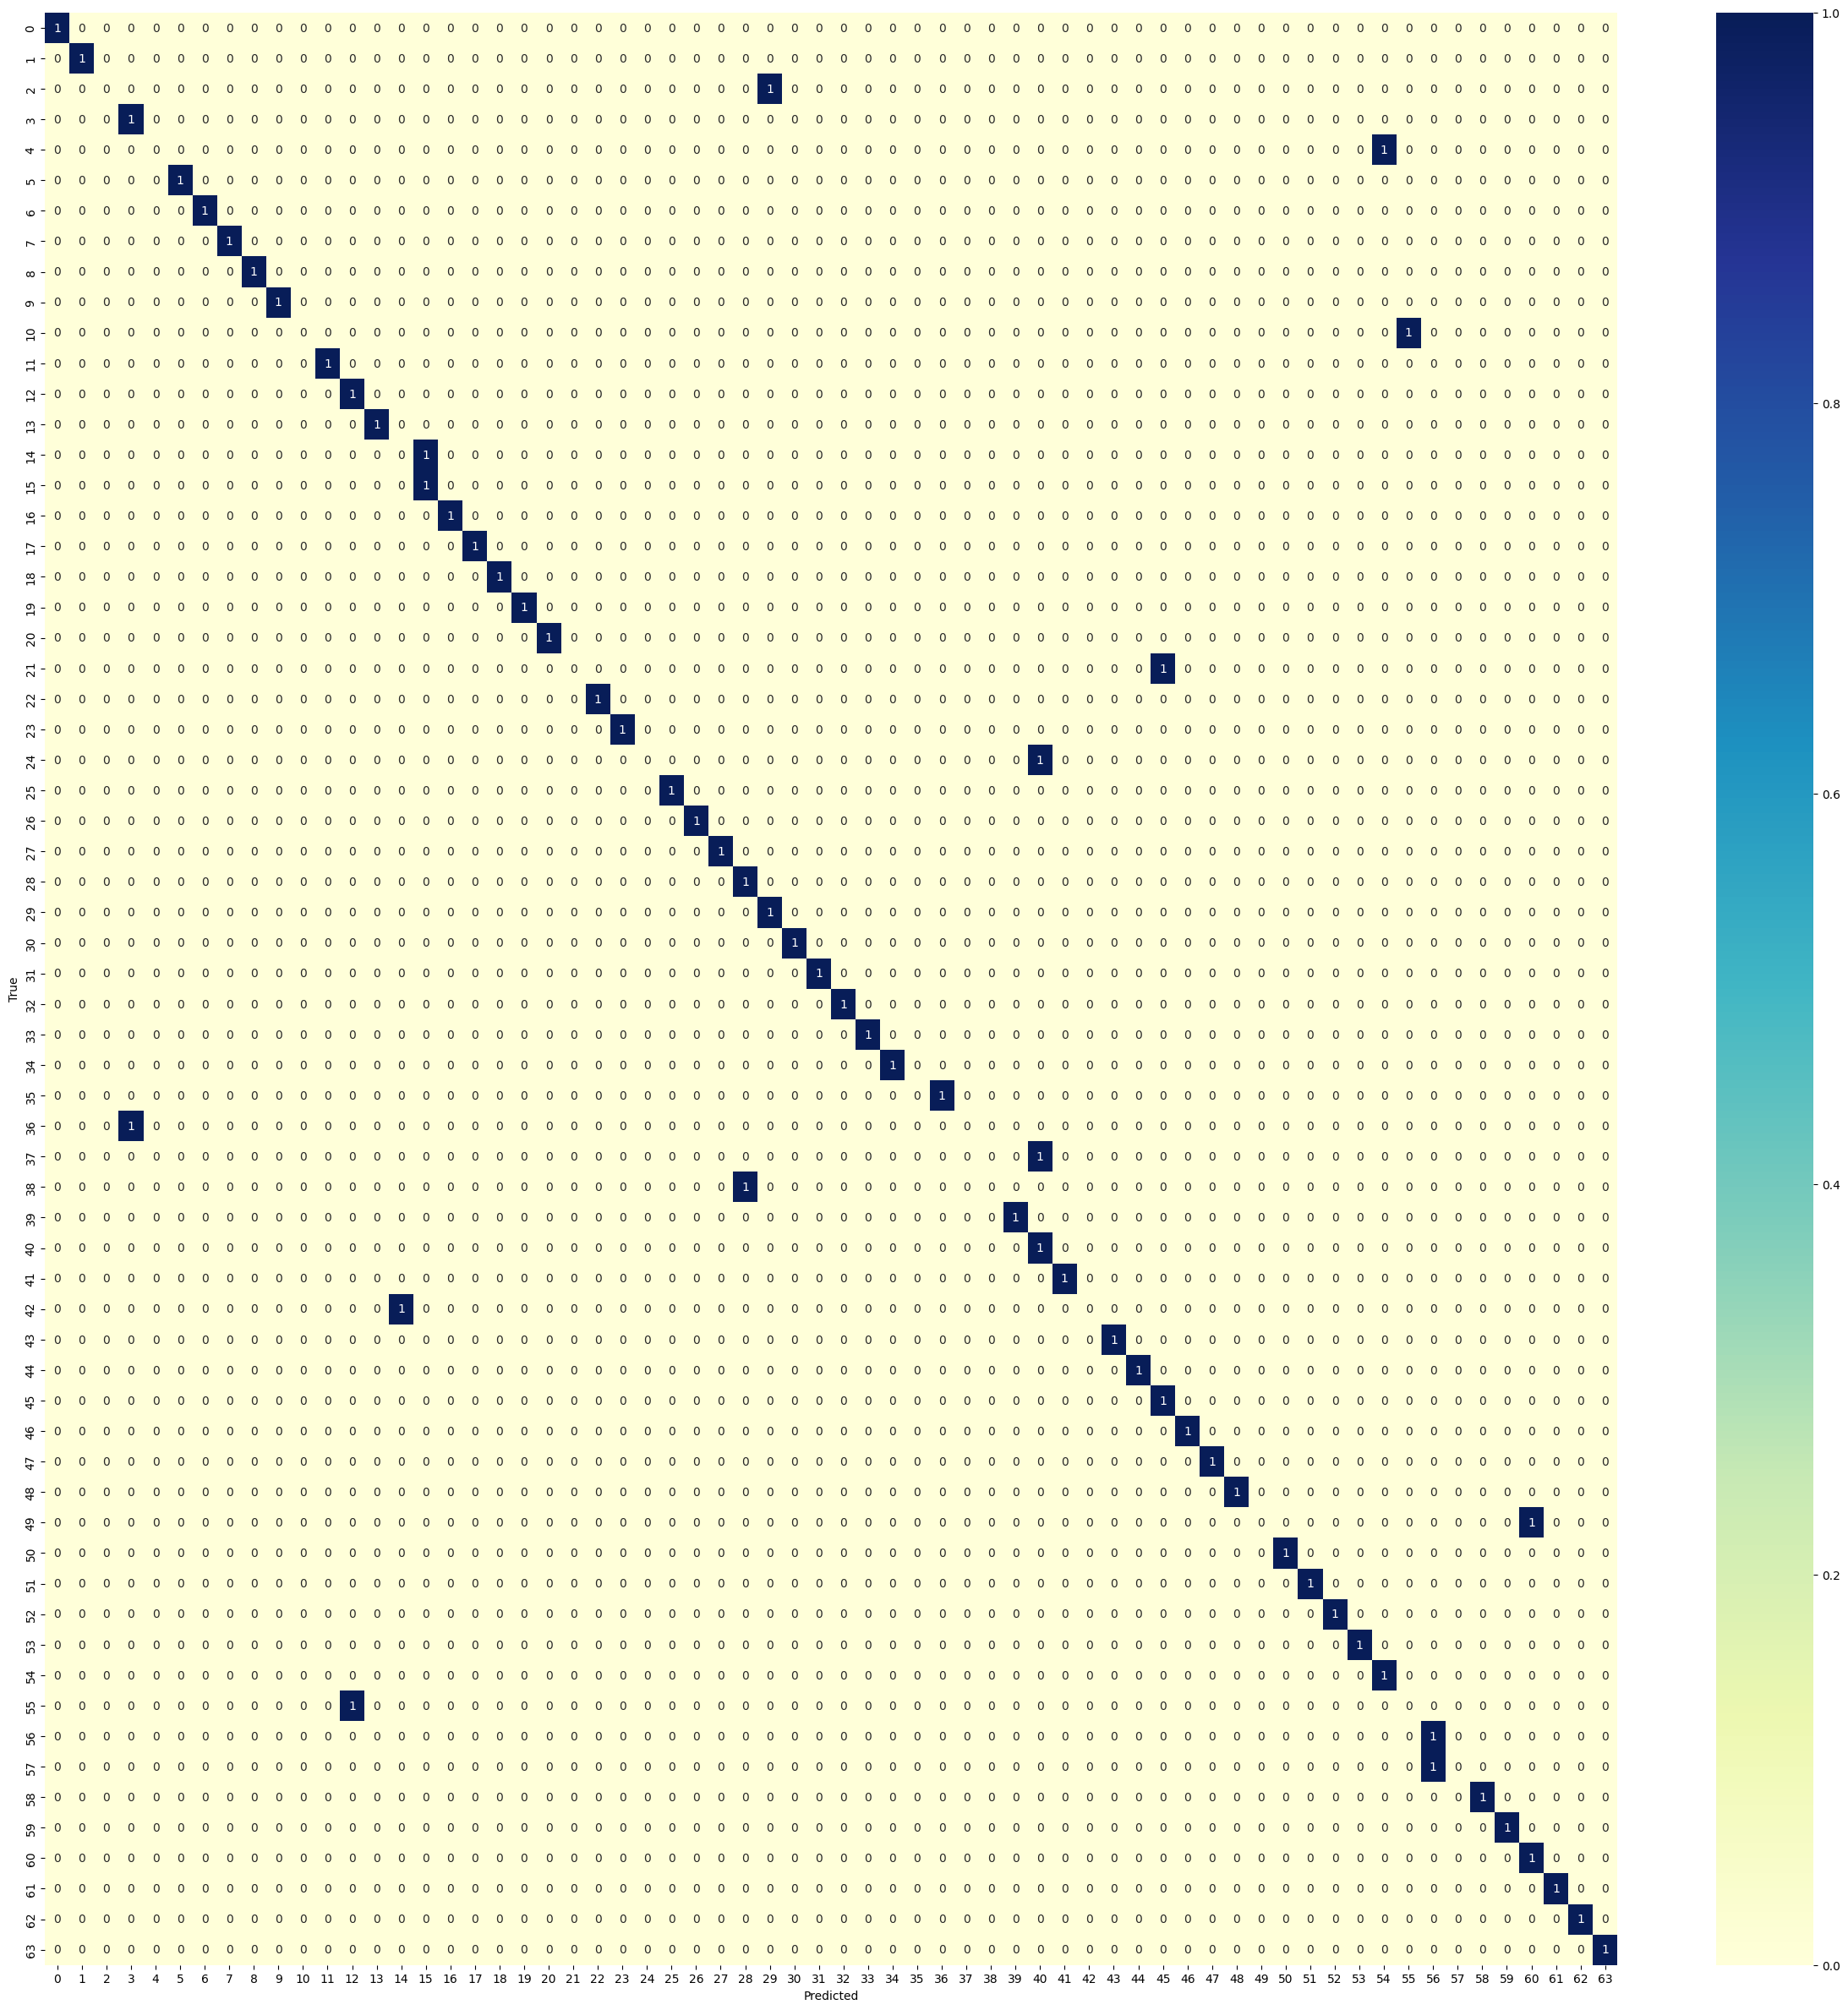

2/2 [==============================] - 0s 25ms/step - loss: 0.9402 - accuracy: 0.7812
Accuracy on validation data: 0.78125
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 179, 901, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 179, 901, 3)      0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 179, 901, 3)      7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 177, 899, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 897, 64)      18496     
    

In [ ]:
#Вычисление матрицы ошибок
y_test_nclasses = [tf.argmax(y_test_g[i]).numpy() for i in range(len(y_test_g))]
y_pred_classes = [tf.argmax(y_pred[i]).numpy() for i in range(len(y_pred))]
confusion_mtx = confusion_matrix(y_test_nclasses, y_pred_classes)

# Отображение матрицы ошибок в графическом виде
plt.figure(figsize=(30,30))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Оценка точности модели на проверочной выборке

accuracy = best_model.evaluate(x_test_g, y_test_g)[1]
accuracy_np = np.array(accuracy)
print("Accuracy on validation data:", accuracy_np)
# Вывод структуры модели
best_model.summary()
best_model = clf.export_model()
best_model.summary()

In [ ]:
# Оценка точности модели на проверочной выборке
accuracy = best_model.evaluate(x_test_g, y_test_g)[1]
print("Accuracy on validation data:", accuracy)

#Авто керас


In [ ]:
from keras.callbacks import EarlyStopping 

In [ ]:
hypermodel = HyperResNet(input_shape=(64, 64, 3), classes=64)

tuner3 = keras_tuner.RandomSearch(
    hypermodel,
    objective="val_accuracy",
    max_trials=4,
    overwrite=True,
    directory="my_dir",
    project_name="ResNet",
)

# Добавляем остановку если нет изменений 
earlystop = EarlyStopping(monitor='val_accuracy', patience=5)

tuner3.search(x_train64_, y_train64_, epochs=50, validation_data=(x_val64_, y_val64_), callbacks=[earlystop])

# Получите лучшую модель
best_model = tuner3.get_best_models(num_models=1)[0]

# Оцените модель на Тестовой выборке
accuracy = best_model.evaluate(x_test64_, y_test64_)[1]
print("Accuracy on validation data:", accuracy)


Trial 4 Complete [00h 02m 02s]
val_accuracy: 0.03846153989434242

Best val_accuracy So Far: 0.03846153989434242
Total elapsed time: 00h 04m 28s
2/2 [==============================] - 5s 415ms/step - loss: 387627968.0000 - accuracy: 0.0000e+00
Accuracy on validation data: 0.0


#Дообучение на новых данных 


In [ ]:
def resize_image(image_path, size):
    # Открываем изображение
    with Image.open(image_path) as img:
        # Меняем размер изображения
        img_resized = img.resize(size)
        # Сохраняем измененное изображение
        img_resized.save(image_path)


In [ ]:
!pip sudo apt-get update

ERROR: unknown command "sudo"


In [ ]:
!pip install image_pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement image_pipeline (from versions: none)
ERROR: No matching distribution found for image_pipeline


In [ ]:
# Разархивация датасета в директорию '/content/drive/MyDrive/Dekart'
!unzip -qo "/content/drive/MyDrive/Dekart/Iris1920x1080.zip" -d /content/drive/MyDrive/Dekart
# Указываем путь к архиву и название папки, в которую нужно распаковать
zip_path = "/content/drive/MyDrive/Dekart/Iris1920x1080.zip"
# Папка с папками картинок, рассортированных по категориям
dir_path = '/content/drive/MyDrive/Dekart/Iris1920x1080/'
# задаем путь до папки с результатами
folder_path = '/content/drive/MyDrive/Dekart/Iris1920x1080/'

# создаем новую папку для тестирования
test_folder_path = '/content/drive/MyDrive/Dekart/test1920x1080'
if not os.path.exists(test_folder_path):
    os.makedirs(test_folder_path)
# проходим по всем папкам в исходной директории
for dirpath, dirnames, filenames in os.walk(folder_path):
    # если в папке есть файлы, выбираем случайный и перемещаем его в новую папку
    if len(filenames) > 0:
        selected_file = random.choice(filenames)
        # создаем новую папку с таким же названием, как исходная
        new_dir_path = os.path.join(test_folder_path, os.path.basename(dirpath))
        if not os.path.exists(new_dir_path):
            os.makedirs(new_dir_path)
        # перемещаем выбранный файл в новую папку
        src_file_path = os.path.join(dirpath, selected_file)
        dst_file_path = os.path.join(new_dir_path, selected_file)
        shutil.move(src_file_path, dst_file_path)
        # удаляем файл из старой папки
        #os.remove(src_file_path)

def ring_to_rect(image):
  """
  Данная функция для развертки круга в плоскость
  :param image: входное изображение типа numpy.ndarray
  :return: развернутое изображение типа numpy.ndarray
  """
  size = image.shape[0]  # размер изображения
  
  outer_radius = size // 2.5  # внешний радиус
  inner_radius_factor = 0.375  # коэффициент внутреннего радиуса относительно внешнего
  
  # Разворачиваем кольцо  
  warped = cv2.warpPolar(image, (size, int(size * math.pi)), (size // 2, size // 2), outer_radius, 0)  
  # Поворачиваем на 90 градусов  
  straightened = cv2.rotate(warped, cv2.ROTATE_90_COUNTERCLOCKWISE)  
  # Обрезаем  
  cropped = straightened[: int(straightened.shape[0] * (1 - inner_radius_factor)), :]  
  
  return cropped

# новая папка для сохранения результатов
new_dir_path = '/content/drive/MyDrive/Dekart/Iris1920x1080/'
# новая папка для сохранения результатов
new_dir_path = '/content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/'

# Проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)

    # Если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Загружаем изображение
                img = cv2.imread(file_path)

                # Производим развертку изображения в плоскость
                img_rect = ring_to_rect(img)

                # Сохраняем изображение в папку
                cv2.imwrite(os.path.join(folder_path, filename), img_rect)
                
                                
                # новая папка для сохранения результатов
                new_folder_path = os.path.join(new_dir_path, foldername)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)
                cv2.imwrite(os.path.join(new_folder_path, filename), img_rect)
                
# Папка с папками картинок, рассортированных по категориям
dir_path = '/content/drive/MyDrive/Dekart/test1920x1080'
# новая папка для сохранения результатов
new_dir_path = '/content/drive/MyDrive/Dekart/test1920x1080-Izm/'

# Проходим по каждому файлу в папке с изображениями
for foldername in os.listdir(dir_path):
    folder_path = os.path.join(dir_path, foldername)

    # Если текущий элемент - папка, проходим по файлам внутри
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Проверяем, что файл является изображением
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Загружаем изображение
                img = cv2.imread(file_path)

                # Производим развертку изображения в плоскость
                img_rect = ring_to_rect(img)

                # Сохраняем изображение в папку
                cv2.imwrite(os.path.join(folder_path, filename), img_rect)
                
                                
                # новая папка для сохранения результатов
                new_folder_path = os.path.join(new_dir_path, foldername)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)
                cv2.imwrite(os.path.join(new_folder_path, filename), img_rect)


# Продолжение

Теперь вы можете увидеть, что находится в загруженной базе. Для этого функцией `listdir()` из модуля **os** получите список папок по адресу **IMAGE_PATH**:

In [ ]:
IMAGE_PATH1 = "/content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/"# Получите список папок
os.listdir(IMAGE_PATH1)

['065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089']

Здесь видно, что файлы распределены по папкам, при этом названия папок соответствуют именам классов (маркам авто). Поэтому зададим список классов из списка папок. Функция `listdir()` возвращает список папок в неопределенном порядке, поэтому список классов желательно отсортировать, чтобы имена классов всегда шли в одном порядке. Метками классов будут индексы имен классов в списке классов. Количество классов определим как длину списка классов.

In [ ]:
# Определение списка имен классов
CLASS_LIST1 = sorted(os.listdir(IMAGE_PATH1))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST1)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST1}')

Количество классов: 25, метки классов: ['065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089']


In [ ]:
# Создаем пустые списки для хранения путей к файлам изображений и меток классов
image_paths_n = []
labels_n = []

# Получаем список папок, содержащихся в директории '/Iris_N/'
dir_path1 = "/content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/"
categories1 = os.listdir(dir_path1)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in categories1:
    category_path1 = os.path.join(dir_path1, category)
    if os.path.isdir(category_path1):
        files = os.listdir(category_path1)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name1 in files:
            file_path1 = os.path.join(category_path1, file_name1)
            image_paths_n.append(file_path1)
            labels_n.append(category)

# Выводим результаты
print("Total number of images:", len(image_paths_n))
print("Total number of labels:", len(labels_n))


Number of images in '065': 15
Number of images in '066': 15
Number of images in '067': 15
Number of images in '068': 15
Number of images in '069': 15
Number of images in '070': 15
Number of images in '071': 15
Number of images in '072': 15
Number of images in '073': 15
Number of images in '074': 15
Number of images in '075': 15
Number of images in '076': 15
Number of images in '077': 15
Number of images in '078': 15
Number of images in '079': 15
Number of images in '080': 15
Number of images in '081': 15
Number of images in '082': 15
Number of images in '083': 15
Number of images in '084': 15
Number of images in '085': 15
Number of images in '086': 15
Number of images in '087': 15
Number of images in '088': 15
Number of images in '089': 15
Total number of images: 375
Total number of labels: 375


In [ ]:
# Создаем пустые списки для хранения путей к файлам изображений и меток классов
test_image_paths = []
test_labels = []

# Получаем список папок, содержащихся в директории '/content/drive/MyDrive/Dekart/test-Izm1'
test_dir_path = '/content/drive/MyDrive/Dekart/test1920x1080-Izm'
test_categories = os.listdir(test_dir_path)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in test_categories:
    category_path = os.path.join(test_dir_path, category)
    if os.path.isdir(category_path):
        files = os.listdir(category_path)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name in files:
            file_path = os.path.join(category_path, file_name)
            test_image_paths.append(file_path)
            test_labels.append(category)

# Выводим результаты
print("Total number of test images:", len(test_image_paths))
print("Total number of test labels:", len(test_labels))

Number of images in '065': 1
Number of images in '066': 1
Number of images in '067': 1
Number of images in '068': 1
Number of images in '069': 1
Number of images in '070': 1
Number of images in '071': 1
Number of images in '072': 1
Number of images in '073': 1
Number of images in '074': 1
Number of images in '075': 1
Number of images in '076': 1
Number of images in '077': 1
Number of images in '078': 1
Number of images in '079': 1
Number of images in '080': 1
Number of images in '081': 1
Number of images in '082': 1
Number of images in '083': 1
Number of images in '084': 1
Number of images in '085': 1
Number of images in '086': 1
Number of images in '087': 1
Number of images in '088': 1
Number of images in '089': 1
Total number of test images: 25
Total number of test labels: 25


In [ ]:

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_n)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Выводим результат
print(onehot_encoded)

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
test_label_encoder = LabelEncoder()
test_integer_encoded = test_label_encoder.fit_transform(test_labels)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
test_onehot_encoder = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
test_onehot_encoded = test_onehot_encoder.fit_transform(test_integer_encoded)

# Выводим результат
print(test_onehot_encoded)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
images_n = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths_n:
    with Image.open(path) as img:
        img = img.resize((901, 179)) # изменяем размер изображения до 900x512 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        images_n.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
images_n = np.array(images_n)

# Преобразуем список меток классов в формат numpy массива

labels_onehot_n = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", images_n.shape)
print("Shape of labels array:", labels_onehot_n.shape)

# Создаем пустой список для изображений
test_images_n = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in test_image_paths:
    with Image.open(path) as img:
        img = img.resize((901, 179)) # изменяем размер изображения до 128x128 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        test_images_n.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
test_images_n = np.array(test_images_n)

# Преобразуем список меток классов в формат numpy массива
test_labels_onehot_n = np.array(test_onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of test images array:", test_images_n.shape)
print("Shape of test labels array:", test_labels_onehot_n.shape)

Shape of images array: (375, 179, 901, 3)
Shape of labels array: (375, 25)
Shape of test images array: (25, 179, 901, 3)
Shape of test labels array: (25, 25)


In [ ]:
# Разделяем данные на тренировочную и тестовую выборки
x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(images_n, labels_onehot_n, test_size=0.2, stratify=labels_onehot_n)
x_test_n, y_test_n =  test_images_n, test_labels_onehot_n
# Выводим размеры тренировочной и тестовой выборок
print("x_train_n shape:", x_train_n.shape)
print("y_train_n shape:", y_train_n.shape)
print("X_val_n shape:", x_val_n.shape)
print("y_val_n shape:", y_val_n.shape)
print("x_test_n shape:", x_test_n.shape)
print("y_test_n shape:", y_test_n.shape)

# Разделяем данные на тренировочную и тестовую выборки
#X_Train64_n, X_val64_n, y_Train64_n, y_val64_n = train_test_split(images64, labels_onehot64_n, test_size=0.2, random_state=42)
#X_train64_n, X_test64_n, y_train64_n, y_test64_n = train_test_split(X_Train64, y_Train64, test_size=0.2, random_state=42)
# Выводим размеры тренировочной и тестовой выборок
#print("X_train_n shape:", X_train64_n.shape)
#print("y_train_n shape:", y_train64_n.shape)
#print("X_val_n shape:", X_val64_n.shape)
#print("y_val_n shape:", y_val64_n.shape)
#print("X_test_n shape:", X_test64_n.shape)
#print("y_test_n shape:", y_test64_n.shape)

x_train_n shape: (300, 179, 901, 3)
y_train_n shape: (300, 25)
X_val_n shape: (75, 179, 901, 3)
y_val_n shape: (75, 25)
x_test_n shape: (25, 179, 901, 3)
y_test_n shape: (25, 25)


# Cохранение и дальнейшая загрузка данных для создания нейронных сетей 

In [ ]:
np.save('/content/drive/MyDrive/Dekart/x_train_n'    , x_train_n)
np.save('/content/drive/MyDrive/Dekart/y_train_n'    , y_train_n)
np.save('/content/drive/MyDrive/Dekart/x_val_n'      , x_val_n)
np.save('/content/drive/MyDrive/Dekart/y_val_n'      , y_val_n)
np.save('/content/drive/MyDrive/Dekart/x_test_n'     , x_test_n)
np.save('/content/drive/MyDrive/Dekart/y_test_n'     , y_test_n)


In [ ]:
print("x_train_n shape:", x_train_n.shape)
print("y_train_n shape:", y_train_n.shape)
print("x_val_n shape:"  , x_val_n.shape)
print("y_val_n shape:"  , y_val_n.shape)
print("x_test_n shape:" , x_test_n.shape)
print("y_test_n shape:" , y_test_n.shape)
#print("x_train shape:", x_train128_.shape)
#print("y_train shape:", y_train128_.shape)
#print("x_val shape:"  , x_val128_.shape)
#print("y_val shape:"  , y_val128_.shape)
#print("x_test shape:" , x_test128_.shape)
#print("y_test shape:" , y_test128_.shape)

x_train_n shape: (300, 179, 901, 3)
y_train_n shape: (300, 25)
x_val_n shape: (75, 179, 901, 3)
y_val_n shape: (75, 25)
x_test_n shape: (25, 179, 901, 3)
y_test_n shape: (25, 25)


In [ ]:
x_train_n =             np.load('/content/drive/MyDrive/Dekart/x_train_n.npy')
y_train_n =             np.load('/content/drive/MyDrive/Dekart/y_train_n.npy')
x_val_n   =             np.load('/content/drive/MyDrive/Dekart/x_val_n.npy')
y_val_n   =             np.load('/content/drive/MyDrive/Dekart/y_val_n.npy')
x_test_n  =             np.load('/content/drive/MyDrive/Dekart/x_test_n.npy')
y_test_n  =             np.load('/content/drive/MyDrive/Dekart/y_test_n.npy')

#x_train64_  =             np.load('/content/drive/MyDrive/Dekart/x_train64_.npy')
#y_train64_  =             np.load('/content/drive/MyDrive/Dekart/y_train64_.npy')
#x_val64_    =             np.load('/content/drive/MyDrive/Dekart/x_val64_.npy')
#y_val64_    =             np.load('/content/drive/MyDrive/Dekart/y_val64_.npy')
#x_test64_   =             np.load('/content/drive/MyDrive/Dekart/x_test64_.npy')
#y_test64_   =             np.load('/content/drive/MyDrive/Dekart/y_test64_.npy')

##Обучение модели на новых данных 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# преобразование мультиклассовых меток в мультиэтикеточные
encoder = OneHotEncoder()
y_test_n_encoded = encoder.fit_transform(y_test_n) 
# определенин inputs и outputs:

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ConvBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, 
                   max_trials=10, objective='val_loss')
'''
В данном примере мы создаем input_node с помощью метода ImageInput(), 
а затем поочередно применяем блоки для нормализации, сверточных слоев, 
плотных слоев и блок для классификации, чтобы определить выходной узел 
output_node.
'''

clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=3,
    objective="val_accuracy"
)

clf.fit(
    x_train_n,
    y_train_n,
    validation_data=(x_val_n, y_val_n),
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=5,
        restore_best_weights=True
    )]
)

# Сохранение модели в формате Tensorflow SavedModel
clf.export_model().save('/content/drive/MyDrive/Dekart/model_New')

Trial 3 Complete [00h 11m 12s]
val_accuracy: 0.7200000286102295

Best val_accuracy So Far: 0.9066666960716248
Total elapsed time: 00h 40m 30s


1/1 [==============================] - 0s 485ms/step - loss: 0.4177 - accuracy: 0.8400
Accuracy on test data: 84.00%


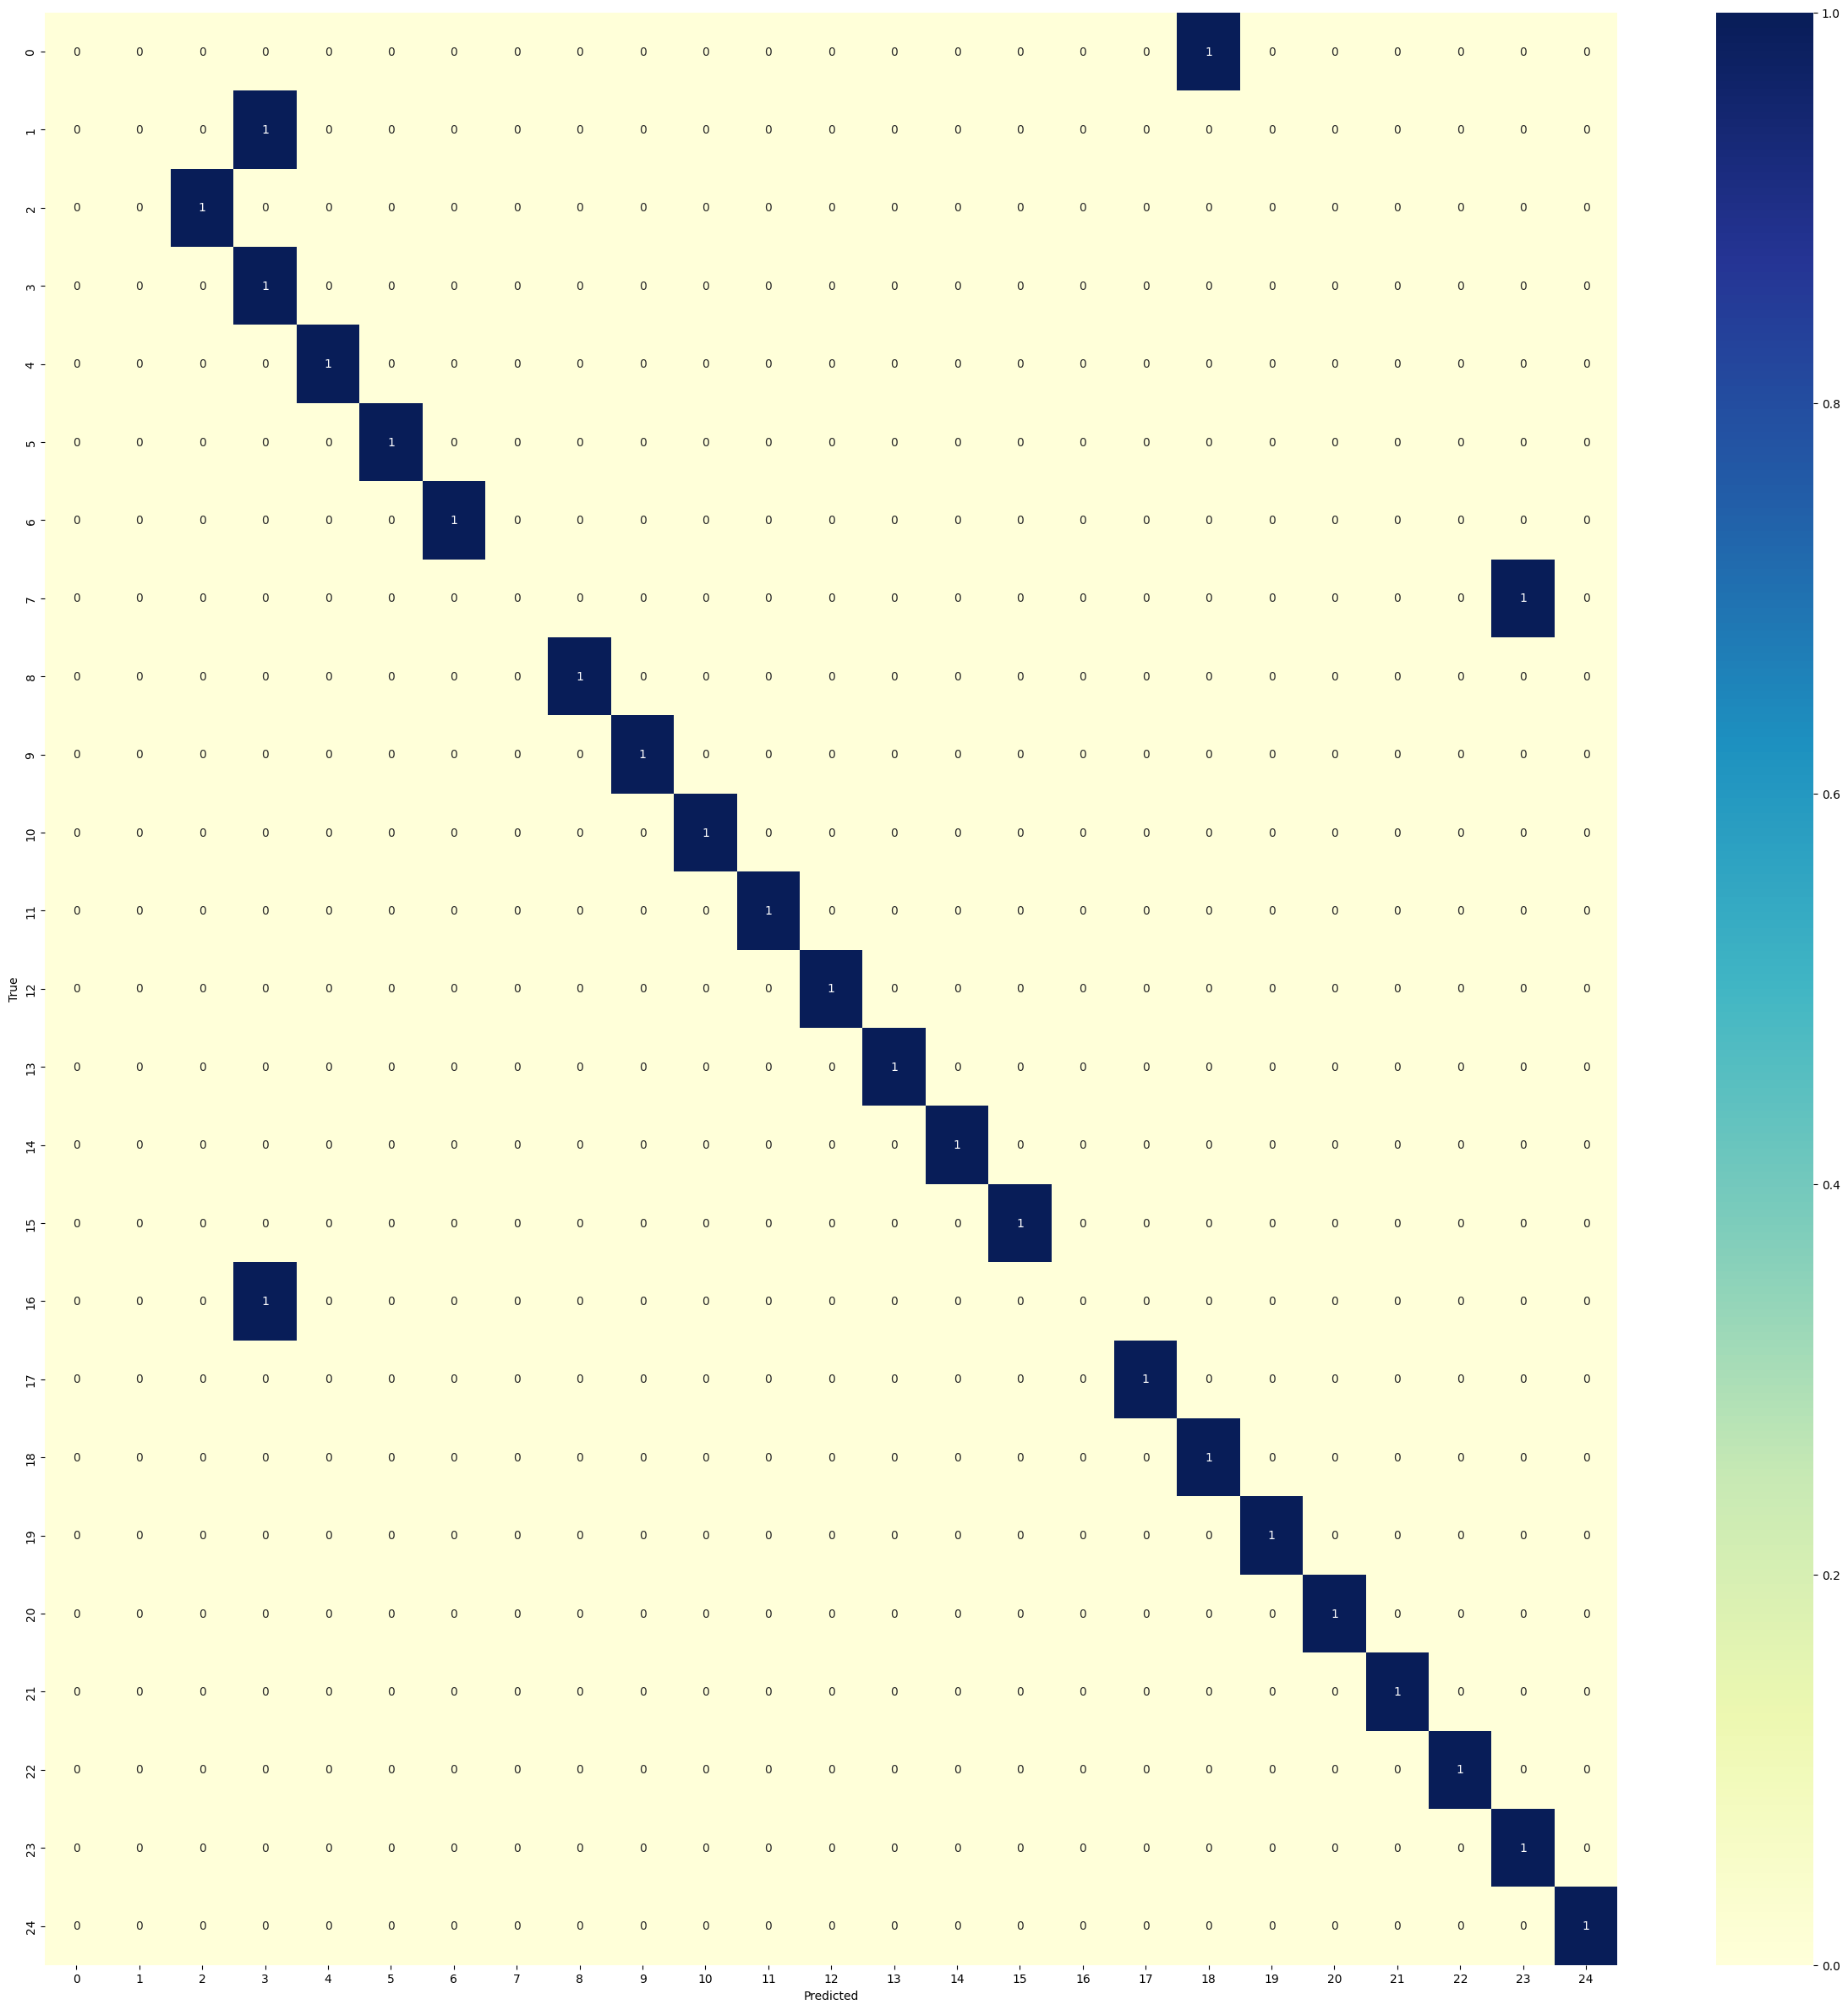

1/1 [==============================] - 0s 319ms/step - loss: 0.4177 - accuracy: 0.8400
Accuracy on validation data: 0.8399999737739563
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 179, 901, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 179, 901, 3)      0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 179, 901, 3)      7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 177, 899, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 897, 32)      924

In [ ]:
# Создание экземпляра модели
best_model = clf.export_model()

# Загрузка весов модели
best_model.load_weights('/content/drive/MyDrive/Dekart/model_New')

# Выполнение предсказаний на тестовой выборке
y_pred = best_model.predict(x_test_n)

# Вычисление точности (accuracy) на тестовой выборке
accuracy = best_model.evaluate(x_test_n, y_test_n)[1]
print("Accuracy on test data: {:.2%}".format(accuracy))

# Вычисление матрицы ошибок
y_test_nclasses = [tf.argmax(y_test_n[i]).numpy() for i in range(len(y_test_n))]
y_pred_classes = [tf.argmax(y_pred[i]).numpy() for i in range(len(y_pred))]
confusion_mtx = confusion_matrix(y_test_nclasses, y_pred_classes)

# Отображение матрицы ошибок в графическом виде
plt.figure(figsize=(30,30))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Оценка точности модели на проверочной выборке

accuracy = best_model.evaluate(x_test_n, y_test_n)[1]
accuracy_np = np.array(accuracy)
print("Accuracy on validation data:", accuracy_np)
# Вывод структуры модели
best_model.summary()

# не работает 


In [ ]:
# Эта команда распакует архив в папку `/content/drive/MyDrive/Dekart/Dekart64_Gabor`
!unzip -qo "/content/drive/MyDrive/Dekart/Dekart-Izm1.zip" -d /content/drive/MyDrive/Dekart
# Указываем путь к архиву и название папки, в которую нужно распаковать
zip_path = "/content/drive/MyDrive/Dekart/Dekart-Izm1.zip"
# Определение списка имен классов для модели 


warning [/content/drive/MyDrive/Dekart/Dekart-Izm1.zip]:  zipfile is empty


In [ ]:
from tensorflow import keras 
import numpy as np
import os
 
# Определение пути к папкам с изображениями
IMAGE_PATH1 = "/content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/" 
IMAGE_PATH2 = '/content/drive/MyDrive/Dekart/Dekart-Izm1' 
 
# Определение списка имен классов 
CLASS_LIST1 = sorted(os.listdir(IMAGE_PATH1)) 
CLASS_LIST2 = sorted(os.listdir(IMAGE_PATH2)) 
 
# Определение количества классов 
CLASS_COUNT1 = len(CLASS_LIST1)
CLASS_COUNT2 = len(CLASS_LIST2) 
 
# Загрузка подготовленных данных
x_train_n = np.load('/content/drive/MyDrive/Dekart/x_train_n.npy') 
y_train_n = np.load('/content/drive/MyDrive/Dekart/y_train_n.npy') 
x_val_n   = np.load('/content/drive/MyDrive/Dekart/x_val_n.npy') 
y_val_n   = np.load('/content/drive/MyDrive/Dekart/y_val_n.npy') 
x_test_n  = np.load('/content/drive/MyDrive/Dekart/x_test_n.npy') 
y_test_n  = np.load('/content/drive/MyDrive/Dekart/y_test_n.npy') 
 
# Загрузка модели с весами, которые мы хотим использовать
model_result = keras.models.load_model('/content/drive/MyDrive/Dekart/model_30.05.1_final')

# Откусываем последний слой у model_result
model_result.layers.pop()

# Заменяем последний слой в модели на слой классификации с нужным числом классов
output_node = keras.layers.Dense(CLASS_COUNT1, activation='softmax')(model_result.layers[-1].output)

# Обновляем модель
clf = keras.Model(inputs=model_result.input, outputs=output_node)

# Компилируем и обучаем модель
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
clf.fit(x_train_n, y_train_n, validation_data=(x_val_n, y_val_n), epochs=50,  
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

# Сохраняем модель
clf.save('/content/drive/MyDrive/Dekart/model_result')

ValueError: ignored

In [ ]:
from tensorflow import keras
# Определение списка имен классов для новой модели 
IMAGE_PATH1 = "/content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/"

# Определение списка имен классов
CLASS_LIST1 = sorted(os.listdir(IMAGE_PATH1))

# Определение количества классов
CLASS_COUNT1 = len(CLASS_LIST1)

# Определение списка имен классов для старой модели 
IMAGE_PATH = '/content/drive/MyDrive/Dekart/Dekart-Izm1'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

x_train_n =             np.load('/content/drive/MyDrive/Dekart/x_train_n.npy')
y_train_n =             np.load('/content/drive/MyDrive/Dekart/y_train_n.npy')
x_val_n   =             np.load('/content/drive/MyDrive/Dekart/x_val_n.npy')
y_val_n   =             np.load('/content/drive/MyDrive/Dekart/y_val_n.npy')
x_test_n  =             np.load('/content/drive/MyDrive/Dekart/x_test_n.npy')
y_test_n  =             np.load('/content/drive/MyDrive/Dekart/y_test_n.npy')


# Создание модели AutoKeras для обучения на новых данных
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ConvBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)

clf = ak.AutoModel(
   inputs=input_node,
    outputs=output_node,
    overwrite=True,
   max_trials=2,
    objective="val_accuracy"
)

clf.fit(
    x_train_n,
    y_train_n,
    validation_data=(x_val_n, y_val_n),
   epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=5,
       restore_best_weights=True
    )]
)
# Сохранение обученной модели
clf.export_model().save('/content/drive/MyDrive/Dekart/model_New')
# Загрузка изначально обученной модели на 64 классах
def create_model(class_count):
    input_layer = keras.Input(shape=(901, 179, 3))
    output_layer = keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(input_layer)
    output_layer = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(output_layer)
    output_layer = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(output_layer)
    output_layer = keras.layers.MaxPooling2D()(output_layer)
    output_layer = keras.layers.Flatten()(output_layer)
    output_layer = keras.layers.Dense(128, activation='relu')(output_layer)
    output_layer = keras.layers.Dense(class_count, activation='softmax')(output_layer)
    return keras.Model(inputs=input_layer, outputs=output_layer)

model = create_model(CLASS_COUNT1)

# Получение весов из загруженной модели
model_result = keras.models.load_model('/content/drive/MyDrive/Dekart/model_30.05.1_final')
# Получение весов из загруженной модели
weights = model_result.get_weights()
# Увеличение числа классов в весах
new_weights = []
new_weights.append(weights[0])
new_weights.append(np.concatenate((weights[1], np.zeros((3, 3, weights[2].shape[3], CLASS_COUNT1-CLASS_COUNT)))))
new_weights.append(np.concatenate((weights[2], np.zeros((1, 1, CLASS_COUNT1-CLASS_COUNT, weights[2].shape[3])))))
for i in range(3, len(weights)):
    new_weights.append(weights[i])
# Присвоение весов модели
model_result.set_weights(new_weights)

# Обучение расширенной модели на новых данных
model_result.fit(
    x_train_n,
    y_train_n,
    validation_data=(x_val_n, y_val_n),
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=5,
        restore_best_weights=True
    )]
)
# Сохранение обученной расширенной модели
model_result.save('/content/drive/MyDrive/Dekart/model_result')

Trial 2 Complete [00h 02m 11s]
val_accuracy: 0.8666666746139526

Best val_accuracy So Far: 0.9333333373069763
Total elapsed time: 00h 05m 25s


IndexError: ignored

In [ ]:
# функция для расширения весов модели, загруженных из файла
# параметры - model_func - функция для создания модели,
# weights_file - имя файла с сохраненными весами,
# class_count - количество классов в файле,
# class_count_new - сколько должно быть классов в новой модели (должно быть больше или равно, чем class_count)
def extend_weights(model_func, weights_file, class_count=CLASS_COUNT, class_count_new= (CLASS_COUNT + CLASS_COUNT1)):
  model = model_func(class_count)
  model.load_weights(weights_file)
  weights = model.get_weights()
  weights[-1] = np.concatenate((weights[-1],np.zeros(class_count_new-class_count)))
  # здесь будет ошибка, если форма предпоследнего слоя не одномерная (например, если будет двумерная свертка)
  weights[-2] = np.concatenate((weights[-2],np.zeros([weights[-2].shape[0],10])),axis=1)
  model_result = model_func(class_count_new)
  model_result.set_weights(weights)
  return model_result

# Загрузка изначально обученной модели на 64 классах
def create_model(class_count):
    input_layer = keras.Input(shape=(901, 179, 3))
    output_layer = keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(input_layer)
    output_layer = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(output_layer)
    output_layer = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(output_layer)
    output_layer = keras.layers.MaxPooling2D()(output_layer)
    output_layer = keras.layers.Flatten()(output_layer)
    output_layer = keras.layers.Dense(128, activation='relu')(output_layer)
    output_layer = keras.layers.Dense(class_count, activation='softmax')(output_layer)
    return keras.Model(inputs=input_layer, outputs=output_layer)


# Получение весов из загруженной модели
model_result = keras.models.load_model('/content/drive/MyDrive/Dekart/model_30.05.1_final')
# Получение весов из загруженной модели
weights_file = model_result.get_weights()

from tensorflow import keras
# Определение списка имен классов для новой модели 
IMAGE_PATH1 = "/content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/"

# Определение списка имен классов
CLASS_LIST1 = sorted(os.listdir(IMAGE_PATH1))

# Определение количества классов
CLASS_COUNT1 = len(CLASS_LIST1)

# Определение списка имен классов для старой модели 
IMAGE_PATH = '/content/drive/MyDrive/Dekart/Dekart-Izm1'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

x_train_n =             np.load('/content/drive/MyDrive/Dekart/x_train_n.npy')
y_train_n =             np.load('/content/drive/MyDrive/Dekart/y_train_n.npy')
x_val_n   =             np.load('/content/drive/MyDrive/Dekart/x_val_n.npy')
y_val_n   =             np.load('/content/drive/MyDrive/Dekart/y_val_n.npy')
x_test_n  =             np.load('/content/drive/MyDrive/Dekart/x_test_n.npy')
y_test_n  =             np.load('/content/drive/MyDrive/Dekart/y_test_n.npy')

                                         
model = extend_weights(create_model, weights_file=weights_file, 
                       class_count=64, class_count_new=89)

AttributeError: ignored

# Результат


In [ ]:
!mkdir /content/drive/MyDrive/Dekart/Dekart_new/
!ls /content/drive/MyDrive/Dekart/
!cp -r /content/drive/MyDrive/Dekart/Dekart1920x1080-Izm/* /content/drive/MyDrive/Dekart/Dekart_new/ 
!cp -r /content/drive/MyDrive/Dekart/Dekart-Izm1/* /content/drive/MyDrive/Dekart/Dekart_new/ 
IMAGE_PATH2 = '/content/drive/MyDrive/Dekart/Dekart_new/' 
!ls /content/drive/MyDrive/Dekart/Dekart_new/
!mkdir /content/drive/MyDrive/Dekart/test_new/
!ls /content/drive/MyDrive/Dekart/
!cp -r /content/drive/MyDrive/Dekart/test1920x1080-Izm/* /content/drive/MyDrive/Dekart/test_new/ 
!cp -r /content/drive/MyDrive/Dekart/test-Izm1/* /content/drive/MyDrive/Dekart/test_new/ 
IMAGE_PATH3 = '/content/drive/MyDrive/Dekart/test_new/' 
!ls /content/drive/MyDrive/Dekart/test_new/

mkdir: cannot create directory ‘/content/drive/MyDrive/Dekart/Dekart_new/’: File exists
1		     test		x_train64_g.npy  y_test_n.npy
Dekart1920x1080-Izm  test1920x1080	X_train64.npy	 y_train128_g.npy
Dekart64	     test1920x1080-Izm	x_train64_.npy	 y_train128.npy
Dekart64.zip	     test-Izm		x_train_g.npy	 y_train128_.npy
Dekart-Izm	     test-Izm1		x_train_n.npy	 y_train64_g.npy
Dekart-Izm1	     test-Izm1.zip	x_val128_g.npy	 y_train64.npy
Dekart-Izm1.zip      test-Izm.zip	X_val128.npy	 y_train64_.npy
Dekart-Izm.zip	     test_new		x_val128_.npy	 y_train_g.npy
Dekart_new	     test.zip		x_val64_g.npy	 y_train_n.npy
Iris1920x1080	     x_test128_g.npy	X_val64.npy	 y_val128_g.npy
Iris1920x1080.zip    X_test128.npy	x_val64_.npy	 y_val128.npy
Iris.zip	     x_test128_.npy	x_val_g.npy	 y_val128_.npy
model_1		     x_test64_g.npy	x_val_n.npy	 y_val64_g.npy
model_24.05	     X_test64.npy	y_test128_g.npy  y_val64.npy
model_24.05_1	     x_test64_.npy	y_test128.npy	 y_val64_.npy
model_30.05.1	     x_test_

In [ ]:


# Определение списка имен классов
CLASS_LIST2 = sorted(os.listdir(IMAGE_PATH2))
# Определение количества классов
CLASS_COUNT2 = len(CLASS_LIST2)
# Проверка результата
print(f'Количество классов: {CLASS_COUNT2}, метки классов: {CLASS_LIST2}')

# Создаем пустые списки для хранения путей к файлам изображений и меток классов
image_paths_n1 = []
labels_n1 = []

# Получаем список папок, содержащихся в директории '/content/drive/MyDrive/Dekart/Dekart_new/'
dir_path1 = "/content/drive/MyDrive/Dekart/Dekart_new/"
categories1 = os.listdir(dir_path1)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in categories1:
    category_path1 = os.path.join(dir_path1, category)
    if os.path.isdir(category_path1):
        files = os.listdir(category_path1)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name1 in files:
            file_path1 = os.path.join(category_path1, file_name1)
            image_paths_n1.append(file_path1)
            labels_n1.append(category)

# Выводим результаты
print("Total number of images:", len(image_paths_n1))
print("Total number of labels:", len(labels_n1))
# Создаем пустые списки для хранения путей к файлам изображений и меток классов
test_image_paths = []
test_labels = []

# Получаем список папок, содержащихся в директории '/content/drive/MyDrive/Dekart/test-Izm1'
test_dir_path = '/content/drive/MyDrive/Dekart/test_new/'
test_categories = os.listdir(test_dir_path)

# Проходим по каждой папке и добавляем в списки путь к файлу изображения и метку класса
for category in test_categories:
    category_path = os.path.join(test_dir_path, category)
    if os.path.isdir(category_path):
        files = os.listdir(category_path)
        print(f"Number of images in '{category}': {len(files)}")
        for file_name in files:
            file_path = os.path.join(category_path, file_name)
            test_image_paths.append(file_path)
            test_labels.append(category)

# Выводим результаты
print("Total number of test images:", len(test_image_paths))
print("Total number of test labels:", len(test_labels))

Количество классов: 89, метки классов: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089']
Number of images in '065': 15
Number of images in '066': 15
Number of images in '067': 15
Number of images in '068': 15
Number of images in '069': 15
Number of images in '070': 15
Number of images in '071': 15
Number of images in '072': 15
Number of images in '073': 15
Number of images in '074': 15
Number of images in '075': 15
Number 

# Продолжение

Теперь вы можете увидеть, что находится в загруженной базе. Для этого функцией `listdir()` из модуля **os** получите список папок по адресу **IMAGE_PATH**:

In [ ]:

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_n1)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Выводим результат
print(onehot_encoded)

# Создаем экземпляр LabelEncoder и преобразуем лейблы в числовой формат
test_label_encoder = LabelEncoder()
test_integer_encoded = test_label_encoder.fit_transform(test_labels)

# Создаем экземпляр OneHotEncoder и преобразуем числовые значения в One-Hot Encoding
test_onehot_encoder = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
test_onehot_encoded = test_onehot_encoder.fit_transform(test_integer_encoded)

# Выводим результат
print(test_onehot_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
images_n1 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in image_paths_n1:
    with Image.open(path) as img:
        img = img.resize((901, 179)) # изменяем размер изображения до 900x512 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        images_n1.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
images_n1 = np.array(images_n1)

# Преобразуем список меток классов в формат numpy массива

labels_onehot_n1 = np.array(onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of images array:", images_n1.shape)
print("Shape of labels array:", labels_onehot_n1.shape)

# Создаем пустой список для изображений
test_images_n1 = []

# Проходим по каждому пути к файлу изображения и добавляем его в список
for path in test_image_paths:
    with Image.open(path) as img:
        img = img.resize((901, 179)) # изменяем размер изображения до 128x128 пикселей
        img = np.array(img) # приводим изображение к формату numpy массива
        test_images_n1.append(img) # добавляем изображение в список

# Преобразуем список в формат numpy массива
test_images_n1 = np.array(test_images_n1)

# Преобразуем список меток классов в формат numpy массива
test_labels_onehot_n = np.array(test_onehot_encoded)

# Выводим размерности массивов с изображениями и метками классов
print("Shape of test images array:", test_images_n1.shape)
print("Shape of test labels array:", test_labels_onehot_n.shape)

Shape of images array: (2091, 179, 901, 3)
Shape of labels array: (2091, 89)
Shape of test images array: (89, 179, 901, 3)
Shape of test labels array: (89, 89)


In [ ]:
# Разделяем данные на тренировочную и тестовую выборки
x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(images_n1, labels_onehot_n1, test_size=0.2, stratify=labels_onehot_n1)
x_test_n, y_test_n =  test_images_n1, test_labels_onehot_n
# Выводим размеры тренировочной и тестовой выборок
print("x_train_n shape:", x_train_n.shape)
print("y_train_n shape:", y_train_n.shape)
print("X_val_n shape:", x_val_n.shape)
print("y_val_n shape:", y_val_n.shape)
print("x_test_n shape:", x_test_n.shape)
print("y_test_n shape:", y_test_n.shape)

# Разделяем данные на тренировочную и тестовую выборки
#X_Train64_n, X_val64_n, y_Train64_n, y_val64_n = train_test_split(images64, labels_onehot64_n, test_size=0.2, random_state=42)
#X_train64_n, X_test64_n, y_train64_n, y_test64_n = train_test_split(X_Train64, y_Train64, test_size=0.2, random_state=42)
# Выводим размеры тренировочной и тестовой выборок
#print("X_train_n shape:", X_train64_n.shape)
#print("y_train_n shape:", y_train64_n.shape)
#print("X_val_n shape:", X_val64_n.shape)
#print("y_val_n shape:", y_val64_n.shape)
#print("X_test_n shape:", X_test64_n.shape)
#print("y_test_n shape:", y_test64_n.shape)

x_train_n shape: (1672, 179, 901, 3)
y_train_n shape: (1672, 89)
X_val_n shape: (419, 179, 901, 3)
y_val_n shape: (419, 89)
x_test_n shape: (89, 179, 901, 3)
y_test_n shape: (89, 89)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# преобразование мультиклассовых меток в мультиэтикеточные
encoder = OneHotEncoder()
y_test_n_encoded = encoder.fit_transform(y_test_n) 
# определенин inputs и outputs:

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ConvBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, 
                   max_trials=10, objective='val_loss')
'''
В данном примере мы создаем input_node с помощью метода ImageInput(), 
а затем поочередно применяем блоки для нормализации, сверточных слоев, 
плотных слоев и блок для классификации, чтобы определить выходной узел 
output_node.
'''

clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=3,
    objective="val_accuracy"
)

clf.fit(
    x_train_n,
    y_train_n,
    validation_data=(x_val_n, y_val_n),
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=5,
        restore_best_weights=True
    )]
)

# Сохранение модели в формате Tensorflow SavedModel
clf.export_model().save('/content/drive/MyDrive/Dekart/model_New')

Trial 1 Complete [02h 51m 55s]
val_accuracy: 0.9737470149993896

Best val_accuracy So Far: 0.9737470149993896
Total elapsed time: 02h 51m 55s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
3                 |3                 |conv_block_2/kernel_size
False             |False             |conv_block_2/separable
True              |True              |conv_block_2/max_pooling
2                 |2                 |conv_block_2/num_blocks
2                 |2                 |conv_block_2/num_layers
32                |32                |conv_block_2/filters_0_0
32                |32                |conv_block_2/filters_0_1
0                 |0                 |conv_block_2/dropout
32                |32                |conv_block_2/filters_1_0
32                |32                |conv_block_2/filters_1_1
True              |True              |dense_block_2/use_batchnorm
2                 |2                 |dense_block_2/num_layers
32                |32      

KeyboardInterrupt: ignored

In [ ]:
# Создание экземпляра модели
best_model = clf.export_model()

# Загрузка весов модели
best_model.load_weights('/content/drive/MyDrive/Dekart/model_result')

# Выполнение предсказаний на тестовой выборке
y_pred = best_model.predict(x_test_n)

# Вычисление точности (accuracy) на тестовой выборке
accuracy = best_model.evaluate(x_test_n, y_test_n)[1]
print("Accuracy on test data: {:.2%}".format(accuracy))

# Вычисление матрицы ошибок
y_test_nclasses = [tf.argmax(y_test_n[i]).numpy() for i in range(len(y_test_n))]
y_pred_classes = [tf.argmax(y_pred[i]).numpy() for i in range(len(y_pred))]
confusion_mtx = confusion_matrix(y_test_nclasses, y_pred_classes)

# Отображение матрицы ошибок в графическом виде
plt.figure(figsize=(30,30))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Оценка точности модели на проверочной выборке

accuracy = best_model.evaluate(x_test_n, y_test_n)[1]
accuracy_np = np.array(accuracy)
print("Accuracy on validation data:", accuracy_np)
# Вывод структуры модели
best_model.summary()